<a href="https://colab.research.google.com/github/DamiSoh/Personal_Project/blob/main/AI_04_%EC%86%8C%EB%8B%B4_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. EDA 및 Feature Engineering








## 1) 데이터 불러오기 및 합치기

In [1]:
#Dataset: 2019년 3분기 ~ 2020년 4분기까지의 영업소별 교통량 데이터 (출처: http://data.ex.co.kr/ (고속도로 공공데이터 포털))
#Train: 2019년 3분기 ~ 2020년 3분기까지의 데이터로, 
#Test: 2020년 4분기의 고속도로 영업소별 교통량을 예측하고자 합니다. 
#1,2종 차량은 승용차, 미니트럭, 버스가 포함되며 
#3종 이상은 화물차입니다. (도로교통공단 차종 구분 공문: http://www.molit.go.kr/USR/policyTarget/dtl.jsp?idx=161)
#화물 교통량 데이터를 예측하고자 하는 목적이므로 3종 이상 교통량을 타겟값으로 설정하겠습니다. 

#데이터 선정의 이유: 
#(1) 통상 고속도로 교통량 예측이 비화물 교통량 예측, 사람운송차량에 한정되어 있었다고 생각하였기 때문이고, 
#(2) 물류업에 종사하면서 보고 느꼈던 많은 특성(변수)들, 가령 날씨, 계절, 설, 추석 연휴 전 물량러쉬 등, 주요 물류 도시(부산, 인천, 울산, 창원, 광양, 평택 등)들의 물량차이 등 특성이 국내 내륙운송 화물흐름에 어떤 영향을 끼치는지 확인하고 싶었기 때문입니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.1f}'.format)

"""
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install category_encoders
!pip install eli5
!pip install pdpbox
!pip install shap 
"""

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.dpi'] = 120
#plt.rc('axes', code_minus=False)

In [2]:
q3_19_org = pd.read_csv('/content/TCS_분기별톨게이트일교통량_1일_분기_2019_3qt', sep =',', encoding='cp949', parse_dates=['집계일자']  )
q4_19_org = pd.read_csv('/content/TCS_분기별톨게이트일교통량_1일_분기_2019_4qt', sep =',', encoding='cp949', parse_dates=['집계일자']  )
q1_20_org = pd.read_csv('/content/TCS_분기별톨게이트일교통량_1일_분기_2020_1qt', sep =',', encoding='cp949', parse_dates=['집계일자']  )
q2_20_org = pd.read_csv('/content/TCS_분기별톨게이트일교통량_1일_분기_2020_2qt', sep =',', encoding='cp949', parse_dates=['집계일자']  )
q3_20_org = pd.read_csv('/content/TCS_분기별톨게이트일교통량_1일_분기_2020_3qt', sep =',', encoding='cp949', parse_dates=['집계일자']  )
q4_20_org = pd.read_csv('/content/TCS_지역별월별톨게이트일교통량_1일_분기_2020_4qt', sep =',', encoding='cp949', parse_dates=['집계일자'] )

In [3]:
q3_19 = q3_19_org.copy()
q4_19 = q4_19_org.copy()
q1_20 = q1_20_org.copy()
q2_20 = q2_20_org.copy()
q3_20 = q3_20_org.copy()
q4_20 = q4_20_org.copy() # 예측해야하는 데이터 (Test Set)

df_list = [q3_19, q4_19, q1_20, q2_20, q3_20, q4_20]
df_titles = ['19년 3분기 영업소 수', '19년 4분기 영업소 수', '20년 1분기 영업소 수', '20년 2분기 영업소 수', '20년 3분기 영업소 수', '20년 4분기 영업소 수']

for i in df_list:
  display(i.shape)
  display(i.head(3))

(128950, 18)

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2019-07-01,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,155,18,56,91,47,3,370
1,2019-07-01,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,585,63,51,95,343,19,1156
2,2019-07-01,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2349,129,176,202,392,325,3573


(129049, 18)

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2019-10-01,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,127,20,62,158,57,3,427
1,2019-10-01,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,593,43,49,88,341,14,1128
2,2019-10-01,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2188,131,199,206,367,311,3402


(127841, 18)

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2020-01-01,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,147,2,3,13,8,9,182
1,2020-01-01,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,311,2,9,16,74,8,420
2,2020-01-01,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,1769,20,40,49,120,260,2258


(127791, 18)

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2020-04-01,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,105,28,74,77,45,0,329
1,2020-04-01,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,466,61,69,106,314,17,1033
2,2020-04-01,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2026,106,220,206,322,317,3197


(129154, 18)

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2020-07-01,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,132,20,69,102,44,2,369
1,2020-07-01,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,519,63,67,96,310,15,1070
2,2020-07-01,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2034,116,202,208,277,320,3157


(128089, 18)

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2020-10-02,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,125,1,5,6,1,1,139
1,2020-10-02,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,336,1,2,5,17,14,375
2,2020-10-02,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,1847,10,23,21,63,246,2210


In [4]:
#테스트 데이터셋에만 있는 관측row 걸러내기 
for i in range(0,6):
  print(df_titles[i], "Unique Value Counts:" , df_list[i]['영업소코드'].nunique())

19년 3분기 영업소 수 Unique Value Counts: 364
19년 4분기 영업소 수 Unique Value Counts: 365
20년 1분기 영업소 수 Unique Value Counts: 365
20년 2분기 영업소 수 Unique Value Counts: 365
20년 3분기 영업소 수 Unique Value Counts: 365
20년 4분기 영업소 수 Unique Value Counts: 371


In [5]:

values1 = q4_20['영업소코드'].unique().tolist() 
values2 = q3_20['영업소코드'].unique().tolist()
list(set(values1) - set(values2))

[770, 771, 710, 780, 720, 724]

In [6]:

condition1 = (q4_20['영업소코드'] == 770) | (q4_20['영업소코드'] == 771) | (q4_20['영업소코드'] == 710) |  (q4_20['영업소코드'] == 780) | (q4_20['영업소코드'] == 724)
drop_rows = q4_20.loc[condition1].index

In [7]:
q4_20.shape

(128089, 18)

In [8]:
q4_20.drop(drop_rows, axis =0, inplace=True)
q4_20.shape

(127794, 18)

In [9]:
total = pd.concat(df_list, axis = 0)
total

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2019-07-01,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,155,18,56,91,47,3,370
1,2019-07-01,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,585,63,51,95,343,19,1156
2,2019-07-01,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2349,129,176,202,392,325,3573
3,2019-07-01,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,10560,271,178,153,1729,688,13579
4,2019-07-01,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,3307,151,243,199,373,423,4696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128084,2020-12-31,532,회인,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,503,8,3,6,12,12,544
128085,2020-12-31,216,횡성,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,494,14,39,30,8,0,585
128086,2020-12-31,216,횡성,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,2417,83,61,73,82,137,2853
128087,2020-12-31,216,횡성,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,478,14,50,31,9,56,638


In [10]:
total['화물교통량'] = total['총교통량'] - total['1종교통량'] 
total['화물교통량'] = total['화물교통량'] - total['2종교통량']
total['비화물교통량'] = total['총교통량'] - total['화물교통량']
total

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,화물교통량,비화물교통량
0,2019-07-01,246,가락,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,155,18,56,91,47,3,370,197,173
1,2019-07-01,246,가락,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,585,63,51,95,343,19,1156,508,648
2,2019-07-01,29,가락(개),0,입구,1,TCS,0,한국도로공사,1,개방식,2349,129,176,202,392,325,3573,1095,2478
3,2019-07-01,29,가락(개),0,입구,2,hi-pass,0,한국도로공사,1,개방식,10560,271,178,153,1729,688,13579,2748,10831
4,2019-07-01,29,가락(개),1,출구,1,TCS,0,한국도로공사,1,개방식,3307,151,243,199,373,423,4696,1238,3458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128084,2020-12-31,532,회인,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,503,8,3,6,12,12,544,33,511
128085,2020-12-31,216,횡성,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,494,14,39,30,8,0,585,77,508
128086,2020-12-31,216,횡성,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,2417,83,61,73,82,137,2853,353,2500
128087,2020-12-31,216,횡성,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,478,14,50,31,9,56,638,146,492


In [11]:
#불필요한 칼럼 지우기 
display(total['고속도로운영기관구분코드'].value_counts(), total['고속도로운영기관명'].value_counts())
columns1 = ['고속도로운영기관구분코드','고속도로운영기관명' ]

0    770579
Name: 고속도로운영기관구분코드, dtype: int64

한국도로공사    770579
Name: 고속도로운영기관명, dtype: int64

In [12]:
columns1 = columns1+['입출구명', '영업형태명'] # 0,1로 분류된 다른 컬럼 존재 (+ info: '영업형태' : 폐쇄식 - 주행요금 계산법 차이로 통상 장거리 고속도로 지불 체계 vs 개방식 - 단거리 고속도로 지불체계)
columns1

['고속도로운영기관구분코드', '고속도로운영기관명', '입출구명', '영업형태명']

In [13]:
columns1 += ['1종교통량', '2종교통량', '3종교통량', '4종교통량', '5종교통량', '6종교통량']

In [14]:
total.drop(columns1, axis =1, inplace=True)
total

,집계일자,영업소코드,영업소명,입출구구분코드,TCS하이패스구분코드,TCS하이패스명,영업형태구분코드,총교통량,화물교통량,비화물교통량
0,2019-07-01,246,가락,0,1,TCS,0,370,197,173
1,2019-07-01,246,가락,0,2,hi-pass,0,1156,508,648
2,2019-07-01,29,가락(개),0,1,TCS,1,3573,1095,2478
3,2019-07-01,29,가락(개),0,2,hi-pass,1,13579,2748,10831
4,2019-07-01,29,가락(개),1,1,TCS,1,4696,1238,3458
...,...,...,...,...,...,...,...,...,...,...
128084,2020-12-31,532,회인,1,2,hi-pass,0,544,33,511
128085,2020-12-31,216,횡성,0,1,TCS,0,585,77,508
128086,2020-12-31,216,횡성,0,2,hi-pass,0,2853,353,2500
128087,2020-12-31,216,횡성,1,1,TCS,0,638,146,492


In [15]:
#전체 교통량 예측에 TCS와 hi-pass의 구분이 필요 없으므로, 해당구분을 없애주겠습니다.
total.head(15)

,집계일자,영업소코드,영업소명,입출구구분코드,TCS하이패스구분코드,TCS하이패스명,영업형태구분코드,총교통량,화물교통량,비화물교통량
0,2019-07-01,246,가락,0,1,TCS,0,370,197,173
1,2019-07-01,246,가락,0,2,hi-pass,0,1156,508,648
2,2019-07-01,29,가락(개),0,1,TCS,1,3573,1095,2478
3,2019-07-01,29,가락(개),0,2,hi-pass,1,13579,2748,10831
4,2019-07-01,29,가락(개),1,1,TCS,1,4696,1238,3458
5,2019-07-01,29,가락(개),1,2,hi-pass,1,15238,2780,12458
6,2019-07-01,596,가락2,1,1,TCS,0,467,166,301
7,2019-07-01,596,가락2,1,2,hi-pass,0,1082,305,777
8,2019-07-01,203,가산,0,1,TCS,0,2040,382,1658
9,2019-07-01,203,가산,0,2,hi-pass,0,9091,1313,7778


In [16]:
cols1 = ['집계일자', '영업소코드', '영업소명', '입출구구분코드', '영업형태구분코드']
total = total.groupby(cols1)['총교통량','화물교통량','비화물교통량'].sum().reset_index()
total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량
0,2019-07-01,11,인천,0,1,79413,11301,68112
1,2019-07-01,11,인천,1,1,86751,12498,74253
2,2019-07-01,12,서영암(개),0,1,1182,130,1052
3,2019-07-01,12,서영암(개),1,1,910,83,827
4,2019-07-01,13,순천만,0,1,2862,375,2487
...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153
394618,2020-12-31,986,고흥,0,0,3693,367,3326
394619,2020-12-31,986,고흥,1,0,4784,448,4336
394620,2020-12-31,987,남순천,0,0,13655,1970,11685


In [17]:
#연, 월, 날짜, 요일, 공휴일 컬럼을 생성하겠습니다.
#1월부터 12월까지 계절을 타는지, 1일부터 31일까지 월초, 월말에 화물이 몰리는지,  주말전에는 화물이 몰릴지 확인할 수 있는 특성이 되어줄 것입니다. 

total['연(Year)'] = total['집계일자'].dt.year
total['월(Month)'] = total['집계일자'].dt.month
total['일(Day)'] = total['집계일자'].dt.day
total['요일(DayofWeek)'] = total['집계일자'].dt.dayofweek
total['주말(Weekend)'] = 0
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0


In [18]:
total['주말(Weekend)'] = np.where(total['요일(DayofWeek)'] == 5, 1, total['주말(Weekend)'])
total['주말(Weekend)'] = np.where(total['요일(DayofWeek)'] == 6, 1, total['주말(Weekend)'])
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0


In [19]:
total['주말(Weekend)'].unique()

array([0, 1])

In [20]:
#공휴일 데이터를 가져오겠습니다. 
holiday = pd.read_csv('/content/holidays19_20.csv')
holiday.rename(columns={'YY':'year', 'MM': 'month', 'DD':'day'}, inplace = True)
holiday.drop('Descriptions', axis = 1, inplace = True)
holiday.dtypes

year     int64
month    int64
day      int64
dtype: object

In [21]:
holiday['date'] = pd.to_datetime(holiday[['year','month','day']])
holiday['공휴일(Holiday)'] = 1
holiday = holiday.iloc[:, 3:]
holiday.rename(columns={'date':'집계일자'}, inplace = True)
holiday

,집계일자,공휴일(Holiday)
0,2019-06-06,1
1,2019-08-15,1
2,2019-09-12,1
3,2019-09-13,1
4,2019-09-14,1
5,2019-10-03,1
6,2019-10-09,1
7,2019-12-25,1
8,2020-01-01,1
9,2020-01-24,1


In [22]:
total = pd.merge(total, holiday, how = 'left', on = '집계일자' )
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,nan
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,nan
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,nan
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,nan
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0,nan
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0,nan
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0,nan
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0,nan


In [23]:
total['공휴일(Holiday)'] = np.where(total['요일(DayofWeek)'] == 6, 1, total['공휴일(Holiday)'])
total['공휴일(Holiday)'].fillna(0, inplace = True)
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0,0.0
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0,0.0
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0,0.0
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0,0.0


In [24]:
#화물은 공휴일 전일에 몰리는 경향이 있으므로, 일요일을 제외한 타 공휴일의 전일도 컬럼을 새로 생성하겠습니다. 

holiday_index = total.loc[(total['공휴일(Holiday)'] == 1) & (total['요일(DayofWeek)'] != 6 )]['집계일자']
holiday_index = np.array(holiday_index)
holiday_index = np.unique(holiday_index)
holiday_index

array(['2019-08-15T00:00:00.000000000', '2019-09-12T00:00:00.000000000',
       '2019-09-13T00:00:00.000000000', '2019-09-14T00:00:00.000000000',
       '2019-10-03T00:00:00.000000000', '2019-10-09T00:00:00.000000000',
       '2019-12-25T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-04-15T00:00:00.000000000',
       '2020-04-30T00:00:00.000000000', '2020-05-05T00:00:00.000000000',
       '2020-06-06T00:00:00.000000000', '2020-08-15T00:00:00.000000000',
       '2020-09-30T00:00:00.000000000', '2020-10-02T00:00:00.000000000',
       '2020-10-03T00:00:00.000000000', '2020-10-09T00:00:00.000000000',
       '2020-12-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [25]:
before_holiday = ['2019-08-14', '2019-09-11', 
       '2019-10-02', '2019-10-08', '2019-12-24', '2020-12-31',
       '2020-01-23', '2020-04-14',
       '2020-04-29', '2020-05-04', '2020-06-05', '2020-08-14',
       '2020-09-29', '2020-10-08',
       '2020-12-24', '2020-12-31']
total['공휴일전일(Before_Holiday)'] = 0

for i in before_holiday:
  total.loc[total['집계일자'] == i, '공휴일전일(Before_Holiday)'] = 1

total.loc[total['집계일자'] == '2020-08-14'] #광복절 전일 확인

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday)
294664,2020-08-14,11,인천,0,1,84577,10317,74260,2020,8,14,4,0,0.0,1
294665,2020-08-14,11,인천,1,1,88873,11137,77736,2020,8,14,4,0,0.0,1
294666,2020-08-14,12,서영암(개),0,1,1852,185,1667,2020,8,14,4,0,0.0,1
294667,2020-08-14,12,서영암(개),1,1,1208,112,1096,2020,8,14,4,0,0.0,1
294668,2020-08-14,13,순천만,0,1,3713,524,3189,2020,8,14,4,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295378,2020-08-14,985,벌교,1,0,3940,309,3631,2020,8,14,4,0,0.0,1
295379,2020-08-14,986,고흥,0,0,4752,476,4276,2020,8,14,4,0,0.0,1
295380,2020-08-14,986,고흥,1,0,5951,515,5436,2020,8,14,4,0,0.0,1
295381,2020-08-14,987,남순천,0,0,16458,1528,14930,2020,8,14,4,0,0.0,1


## 2) 특성 추가하기(외부 데이터)




### (1) 지역 및 자치구 데이터

In [26]:
#http://data.ex.co.kr/ (도로교통공단 - 하이패스 단말기 영업소 정보) - location
#상기 데이터에 없는 내역은 따로 불러오겠습니다. - location2
location = pd.read_csv('/content/4 하이패스 단말기 영업소 정보_최종 (1).csv', sep = ',', encoding='cp949')
location

,본부명,지사명,영업소명,전화번호,팩스번호,우편번호,주소
0,수도권,인천,인천,032-545-0127,032-545-0129,407-070,인천광역시 계양구 경인고속도로 17
1,수도권,인천,김포,031-985-0456,031-985-0454,415-812,경기도 김포시 고촌읍 서울외곽순환고속도로 76
2,수도권,시흥,남인천,032-466-7411,031-412-4482,405-270,인천광역시 남동구 음실로 117번길 32
3,수도권,시흥,서서울,031-486-3830,031-412-4483,426-420,경기도 안산시 상록구 방아고개길 99
4,수도권,시흥,시흥,031-312-0403,031-412-4481,429-130,경기도 시흥시 서해안로 1780번길94 (계수동)
...,...,...,...,...,...,...,...
324,경남,창녕,달성,053-614-8358,055-530-9482,711-840,대구광역시 달성군 옥포면 송촌길 229
325,경남,창녕,현풍,053-611-4532,053-611-4532,711-871,대구광역시 달성군 현풍면 중부내륙지선고속도로 2 73-1
326,경남,창녕,창녕,055-533-4416,055-533-0678,635-800,경상 창녕군 창녕읍 우포1대로 1513
327,경남,창녕,칠원,055-587-4610,055-587-4610,737-920,경상남도 함안군 칠원면 오곡로 158-2


In [27]:
location2 = pd.read_csv('/content/location2.csv')
location2

,영업소명,자치구,도시명
0,서영암(개),전라남도,영암군
1,가락(개),부산광역시,강서구
2,대동(개),경상남도,김해시
3,부산,부산광역시,금정구
4,서김해,경상남도,김해시
...,...,...,...
59,서양양,강원도,양양군
60,양촌,충청남도,논산시
61,한림,경상남도,김해시
62,중앙탑,충청북도,충주시


In [28]:
district = []
city = []

def loc_find(x):
  district.append(x.split(' ')[0])
  city.append(x.split(' ')[1])

location['주소'].apply(loc_find)

0      None
1      None
2      None
3      None
4      None
       ... 
324    None
325    None
326    None
327    None
328    None
Name: 주소, Length: 329, dtype: object

In [29]:
len(district), len(city)

(329, 329)

In [30]:
location['자치구'] = district
location['도시명'] = city

In [31]:
location = location[['영업소명', '전화번호', '자치구', '도시명' ]]

In [32]:
total['자치구'] = 0
total['도시명'] = 0

In [33]:
total.shape

(394622, 17)

In [34]:
location.head(5)

,영업소명,전화번호,자치구,도시명
0,인천,032-545-0127,인천광역시,계양구
1,김포,031-985-0456,경기도,김포시
2,남인천,032-466-7411,인천광역시,남동구
3,서서울,031-486-3830,경기도,안산시
4,시흥,031-312-0403,경기도,시흥시


In [35]:
branch = location['영업소명'].unique().tolist()

In [36]:
for i in branch:
  total.loc[total['영업소명'] == i, '자치구'] = location.loc[location['영업소명'] == i].iloc[0,2]
  total.loc[total['영업소명'] == i, '도시명'] = location.loc[location['영업소명'] == i].iloc[0,3]

In [37]:
display(total.shape)
total.head(20)

(394622, 17)

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,0,0
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,0,0
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시
5,2019-07-01,13,순천만,1,1,3122,422,2700,2019,7,1,0,0,0.0,0,전라남도,순천시
6,2019-07-01,29,가락(개),0,1,17152,3843,13309,2019,7,1,0,0,0.0,0,0,0
7,2019-07-01,29,가락(개),1,1,19934,4018,15916,2019,7,1,0,0,0.0,0,0,0
8,2019-07-01,53,남인천,0,1,42692,5964,36728,2019,7,1,0,0,0.0,0,인천광역시,남동구
9,2019-07-01,53,남인천,1,1,43953,6009,37944,2019,7,1,0,0,0.0,0,인천광역시,남동구


In [38]:
null_branch = total.loc[total['자치구'] == 0, '영업소명'].unique()
null_branch

array(['서영암(개)', '가락(개)', '대동(개)', '부산', '서김해', '동김해', '북부산', '대관령', '평창',
       '덕평휴게소', '금강휴게소', '동고령', '대동', '동남원', '주암송광사', '남양양', '통도사휴게소',
       '북무안', '가락2', '북양양', '속초', '삼척', '근덕', '남이천', '남경주', '남포항', '동경주',
       '동상주', '서의성', '북의성', '동안동', '청송', '활천', '임고', '신둔', '유천', '북현풍',
       '행담도', '옥산', '동둔내', '남양평', '삼성', '평택고덕', '기장일광입구', '범서', '동청송영양',
       '영덕', '기장동JC', '기장일광(KEC)', '기장철마', '금정', '김해가야휴게소', '광재', '진영',
       '진영휴게소', '기장서JC', '내촌', '인제', '구병산', '서양양', '양촌', '한림', '중앙탑',
       '밀양입구JC'], dtype=object)

In [39]:
total.shape, len(total.loc[total['자치구'] == 0])

((394622, 17), 63575)

In [40]:
for i in null_branch:
  total.loc[total['영업소명'] == i, '자치구'] = location2.loc[location2['영업소명'] == i].iloc[0,1]
  total.loc[total['영업소명'] == i, '도시명'] = location2.loc[location2['영업소명'] == i].iloc[0,2]

In [41]:
total.shape, len(total.loc[total['자치구'] == 0])

((394622, 17), 0)

In [42]:
#자치구명을 통합해주겠습니다.
total['자치구'].unique()

array(['인천광역시', '전라남도', '부산광역시', '경기도', '경상남도', '충청남도', '충청북도', '대전광역시',
       '경상북도', '대구광역시', '울산광역시', '충남', '전북', '전라북도', '강원도', '경상북도칠곡군',
       '경남', '광주광역시', '세종특별자치시'], dtype=object)

In [43]:
# 충청남도, 충남 -> 충청남도 
# 전라북도, 전북 -> 전라북도
# 경상북도, 경상북도칠곡군 -> 경상북도
# 경상남도, 경남 -> 경상남도

total.loc[total['자치구'] == '충남', '자치구'] = '충청남도'
total.loc[total['자치구'] == '전북', '자치구'] = '전라북도'
total.loc[total['자치구'] == '경상북도칠곡군', '자치구'] = '경상북도'
total.loc[total['자치구'] == '경남', '자치구'] = '경상남도'

total['자치구'].unique()

array(['인천광역시', '전라남도', '부산광역시', '경기도', '경상남도', '충청남도', '충청북도', '대전광역시',
       '경상북도', '대구광역시', '울산광역시', '전라북도', '강원도', '광주광역시', '세종특별자치시'],
      dtype=object)

In [44]:
# 도시명을 통합해주겠습니다.
# 칠곡군, 가산면중앙고속도로127 -> 칠곡군 

total.loc[total['도시명'] == '가산면중앙고속도로127', '도시명'] = '칠곡군'

In [45]:
total.head(5)

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시


### (2) 일평균기온, 일강수량, 일 풍속 날씨 데이터 (weather)

In [46]:
#자료출처: https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

weather = pd.read_csv('/content/OBS_ASOS_DD_20210627235801.csv', sep =',', encoding='cp949', parse_dates= ['일시']) 
weather.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,108,서울,2019-07-01,23.9,nan,2.3
1,108,서울,2019-07-02,24.4,nan,2.3
2,108,서울,2019-07-03,24.1,nan,1.7
3,108,서울,2019-07-04,25.4,nan,1.9
4,108,서울,2019-07-05,27.6,0.0,1.5


In [47]:
weather['지점명'].unique()

array(['서울', '인천', '원주', '청주', '대전', '상주', '대구', '전주', '울산', '광주', '부산',
       '순천', '이천', '천안', '세종', '김해시'], dtype=object)

In [48]:
weather.replace(['서울', '인천', '원주', '청주', '대전', '상주', '대구', '전주', '울산', '광주', '부산', '순천', '이천', '천안', '세종', '김해시'],
                ['서울특별시', '인천광역시', '강원도', '충청북도', '대전광역시', '경상북도', '대구광역시', '전라북도', '울산광역시', '광주광역시', '부산광역시', '전라남도', '경기도', '충청남도', '세종특별자치시', '경상남도'],
                inplace = True
)

In [49]:
weather = weather[['지점명', '일시', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)']]
weather.rename(columns = {'지점명': '자치구', '일시':'집계일자', '평균기온(°C)': '평균기온(°C)', '일강수량(mm)': '일강수량(mm)', '평균 풍속(m/s)': '평균 풍속(m/s)'}, inplace = True)
weather.fillna(0, inplace = True)
weather

,자치구,집계일자,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,서울특별시,2019-07-01,23.9,0.0,2.3
1,서울특별시,2019-07-02,24.4,0.0,2.3
2,서울특별시,2019-07-03,24.1,0.0,1.7
3,서울특별시,2019-07-04,25.4,0.0,1.9
4,서울특별시,2019-07-05,27.6,0.0,1.5
...,...,...,...,...,...
8793,경상남도,2020-12-27,4.3,2.6,1.1
8794,경상남도,2020-12-28,5.4,0.0,1.7
8795,경상남도,2020-12-29,5.3,3.0,1.8
8796,경상남도,2020-12-30,-3.8,0.7,5.1


In [50]:
total.shape

(394622, 17)

In [51]:
total['집계일자'] = total['집계일자'].astype(str)
weather['집계일자'] = weather['집계일자'].astype(str)

In [52]:
def to_str(x):
  x = x.split(' ')[0]
  return x

In [53]:
total['집계일자'].apply(to_str)

0         2019-07-01
1         2019-07-01
2         2019-07-01
3         2019-07-01
4         2019-07-01
             ...    
394617    2020-12-31
394618    2020-12-31
394619    2020-12-31
394620    2020-12-31
394621    2020-12-31
Name: 집계일자, Length: 394622, dtype: object

In [54]:
total[['집계일자']]

,집계일자
0,2019-07-01
1,2019-07-01
2,2019-07-01
3,2019-07-01
4,2019-07-01
...,...
394617,2020-12-31
394618,2020-12-31
394619,2020-12-31
394620,2020-12-31


In [55]:
total = pd.merge(total, weather, how = 'left', on = ['자치구', '집계일자']) #참고: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [56]:
total.shape

(394622, 20)

In [57]:
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0,0.0,1,전라남도,보성군,-4.0,0.0,3.5
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0,0.0,1,전라남도,순천시,-4.0,0.0,3.5


In [58]:
display(weather.loc[(weather['자치구'] == '전라남도') & (weather['집계일자'] == '2020-12-15')]) #확인 
display(total.loc[(total['자치구'] == '전라남도') & (total['집계일자'] == '2020-12-15')])

,자치구,집계일자,평균기온(°C),일강수량(mm),평균 풍속(m/s)
6583,전라남도,2020-12-15,-3.8,0.0,3.4


,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s)
382384,2020-12-15,12,서영암(개),0,1,1112,96,1016,2020,12,15,1,0,0.0,0,전라남도,영암군,-3.8,0.0,3.4
382385,2020-12-15,12,서영암(개),1,1,881,73,808,2020,12,15,1,0,0.0,0,전라남도,영암군,-3.8,0.0,3.4
382386,2020-12-15,13,순천만,0,1,3039,525,2514,2020,12,15,1,0,0.0,0,전라남도,순천시,-3.8,0.0,3.4
382387,2020-12-15,13,순천만,1,1,3126,528,2598,2020,12,15,1,0,0.0,0,전라남도,순천시,-3.8,0.0,3.4
382392,2020-12-15,56,일로,0,1,551,61,490,2020,12,15,1,0,0.0,0,전라남도,무안군,-3.8,0.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383097,2020-12-15,985,벌교,1,0,2587,439,2148,2020,12,15,1,0,0.0,0,전라남도,보성군,-3.8,0.0,3.4
383098,2020-12-15,986,고흥,0,0,3424,529,2895,2020,12,15,1,0,0.0,0,전라남도,고흥군,-3.8,0.0,3.4
383099,2020-12-15,986,고흥,1,0,3837,588,3249,2020,12,15,1,0,0.0,0,전라남도,고흥군,-3.8,0.0,3.4
383100,2020-12-15,987,남순천,0,0,13000,3464,9536,2020,12,15,1,0,0.0,0,전라남도,순천시,-3.8,0.0,3.4


In [59]:
total.isnull().sum() #Null값 확인 

집계일자                       0
영업소코드                      0
영업소명                       0
입출구구분코드                    0
영업형태구분코드                   0
총교통량                       0
화물교통량                      0
비화물교통량                     0
연(Year)                    0
월(Month)                   0
일(Day)                     0
요일(DayofWeek)              0
주말(Weekend)                0
공휴일(Holiday)               0
공휴일전일(Before_Holiday)      0
자치구                        0
도시명                        0
평균기온(°C)                 122
일강수량(mm)                 122
평균 풍속(m/s)               122
dtype: int64

In [60]:
total.loc[total['평균기온(°C)'].isnull()]

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s)
105521,2019-11-25,108,천안,0,0,32175,4495,27680,2019,11,25,0,0,0.0,0,충청남도,천안시,nan,nan,nan
105522,2019-11-25,108,천안,1,0,33133,4879,28254,2019,11,25,0,0,0.0,0,충청남도,천안시,nan,nan,nan
105523,2019-11-25,109,계룡,0,0,2781,548,2233,2019,11,25,0,0,0.0,0,충청남도,계룡시,nan,nan,nan
105524,2019-11-25,109,계룡,1,0,3046,658,2388,2019,11,25,0,0,0.0,0,충청남도,계룡시,nan,nan,nan
105525,2019-11-25,110,목천,0,0,6182,1468,4714,2019,11,25,0,0,0.0,0,충청남도,천안시,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106809,2019-11-26,595,서공주,0,0,2307,426,1881,2019,11,26,1,0,0.0,0,충청남도,공주시,nan,nan,nan
106810,2019-11-26,595,서공주,1,0,2060,385,1675,2019,11,26,1,0,0.0,0,충청남도,공주시,nan,nan,nan
106816,2019-11-26,599,양촌,0,0,815,37,778,2019,11,26,1,0,0.0,0,충청남도,논산시,nan,nan,nan
106817,2019-11-26,599,양촌,1,0,817,36,781,2019,11,26,1,0,0.0,0,충청남도,논산시,nan,nan,nan


In [61]:
display(weather.loc[(weather['자치구'] == '충청남도') & (weather['집계일자'] == '2019-11-25')]) #2019년 11월 25일과 26일, 충청남도 날씨관측치 데이터가 없습니다. 
display(weather.loc[(weather['자치구'] == '충청남도') & (weather['집계일자'] == '2019/11/26')]) #따로 서치하여 넣어주도록 하겠습니다. 

,자치구,집계일자,평균기온(°C),일강수량(mm),평균 풍속(m/s)


,자치구,집계일자,평균기온(°C),일강수량(mm),평균 풍속(m/s)


In [62]:
total.loc[(total['자치구'] == '충청남도') & (total['집계일자'] == '2019-11-25'), '평균기온(°C)'] = 2.5
total.loc[(total['자치구'] == '충청남도') & (total['집계일자'] == '2019-11-25'), '일강수량(mm)'] = 0
total.loc[(total['자치구'] == '충청남도') & (total['집계일자'] == '2019-11-25'), '평균 풍속(m/s)'] = 2.6
total.loc[(total['자치구'] == '충청남도') & (total['집계일자'] == '2019-11-26'), '평균기온(°C)'] = 7.2
total.loc[(total['자치구'] == '충청남도') & (total['집계일자'] == '2019-11-26'), '일강수량(mm)'] = 0
total.loc[(total['자치구'] == '충청남도') & (total['집계일자'] == '2019-11-26'), '평균 풍속(m/s)'] = 1.4
total.iloc[[105900]]

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s)
105900,2019-11-25,299,해미,1,0,2924,614,2310,2019,11,25,0,0,0.0,0,충청남도,서산시,2.5,0.0,2.6


In [63]:
total.isnull().sum() #확인

집계일자                     0
영업소코드                    0
영업소명                     0
입출구구분코드                  0
영업형태구분코드                 0
총교통량                     0
화물교통량                    0
비화물교통량                   0
연(Year)                  0
월(Month)                 0
일(Day)                   0
요일(DayofWeek)            0
주말(Weekend)              0
공휴일(Holiday)             0
공휴일전일(Before_Holiday)    0
자치구                      0
도시명                      0
평균기온(°C)                 0
일강수량(mm)                 0
평균 풍속(m/s)               0
dtype: int64

### (3) 인구 데이터 

In [64]:
population = pd.read_csv('/content/2020_행정구역_시군구_별__성별_인구수_20210628135016.csv', encoding = 'cp949')

In [65]:
population.columns = population.iloc[0]
population.drop(0, axis = 0, inplace = True) #첫번째 행을 컬럼으로 하겠습니다. 

In [66]:
population.drop([1, 18], axis = 0, inplace = True) #전국 및 제주도 데이터를 제거해주겠습니다.
population.reset_index(inplace = True, drop = True)
population

,행정구역(시군구)별,총인구수 (명)
0,서울특별시,9720846
1,부산광역시,3404423
2,대구광역시,2427954
3,인천광역시,2947217
4,광주광역시,1455048
5,대전광역시,1471040
6,울산광역시,1142190
7,세종특별자치시,345341
8,경기도,13338020
9,강원도,1539282


In [67]:
population.rename(columns = {'행정구역(시군구)별':'자치구', '총인구수 (명)':'총인구수(명)'}, inplace = True) #total 데이터와 합쳐주기위해 컬럼명을 수정하겠습니다.
population

,자치구,총인구수(명)
0,서울특별시,9720846
1,부산광역시,3404423
2,대구광역시,2427954
3,인천광역시,2947217
4,광주광역시,1455048
5,대전광역시,1471040
6,울산광역시,1142190
7,세종특별자치시,345341
8,경기도,13338020
9,강원도,1539282


In [68]:
total = pd.merge(total, population, how = 'left', on = '자치구')
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0,0.0,1,전라남도,보성군,-4.0,0.0,3.5,1854618
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5,1854618
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5,1854618
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0,0.0,1,전라남도,순천시,-4.0,0.0,3.5,1854618



### (4) 광업, 제조업 생산액과 사업체 데이터

출처: https://kosis.kr/statisticsList

In [69]:
#pd.set_option('display.max_rows',250)
production_yield_org = pd.read_csv('/content/2017_광업제조업_생산액_20210628141544.csv', encoding = 'cp949')
production_yield_org

,행정구역별(1),행정구역별(2),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2017.10,2017.11
0,행정구역별(1),행정구역별(2),합계,합계,합계,합계,광업,광업,광업,광업,제조업,제조업,제조업,제조업
1,행정구역별(1),행정구역별(2),사업체수 (개),생산액 (백만원),출하액 (백만원),부가가치 (백만원),사업체수 (개),생산액 (백만원),출하액 (백만원),부가가치 (백만원),사업체수 (개),생산액 (백만원),출하액 (백만원),부가가치 (백만원)
2,서울특별시,소계,4225,31440816,31325195,14194800,0,0,0,0,4225,31440816,31325195,14194800
3,서울특별시,종로구,113,473901,466473,175889,0,0,0,0,113,473901,466473,175889
4,서울특별시,중구,233,1040201,1038326,513791,0,0,0,0,233,1040201,1038326,513791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,경상남도,함양군,41,272480,314216,126744,2,X,X,X,39,303802,306490,119890
242,경상남도,거창군,59,795033,747899,237486,5,15585,99,14057,54,737465,732303,223429
243,경상남도,합천군,26,168562,184288,84873,1,X,X,X,25,176529,177265,78664
244,제주특별자치도,제주시,163,1566948,1560533,721375,6,X,X,X,157,1517469,1511054,686158


In [70]:
production_yield = production_yield_org.iloc[1:, :] #컬럼명을 조정하고, 필요한 컬럼만 쓰겠습니다.
production_yield.columns = production_yield_org.iloc[1]
production_yield.drop(1, axis = 0, inplace = True)
production_yield.reset_index(inplace=True, drop=True)
production_yield = production_yield.iloc[:, :5]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
production_yield = production_yield.loc[production_yield['행정구역별(2)'] == '소계']
production_yield = production_yield[['행정구역별(1)', '사업체수 (개)', '출하액 (백만원)']]
production_yield.reset_index(inplace=True, drop=True)
production_yield.rename(columns={'행정구역별(1)':'자치구', '사업체수 (개)':'제조업사업체수(개)', '출하액 (백만원)':'제조업출하액(백만원)'}, inplace=True) #기본 데이터와 합쳐주기 위해 컬럼명을 수정하겠습니다.
production_yield

1,자치구,제조업사업체수(개),제조업출하액(백만원)
0,서울특별시,4225,31325195
1,부산광역시,4086,43706972
2,대구광역시,3313,29966108
3,인천광역시,4711,71659882
4,광주광역시,1240,32558076
5,대전광역시,868,18362191
6,울산광역시,1745,176510317
7,세종특별자치시,300,7193577
8,경기도,24741,402658105
9,강원도,1070,14379324


In [72]:
total = pd.merge(total, production_yield, how = 'left', on = '자치구')
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618,1720,101554448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0,0.0,1,전라남도,보성군,-4.0,0.0,3.5,1854618,1720,101554448
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5,1854618,1720,101554448
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5,1854618,1720,101554448
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0,0.0,1,전라남도,순천시,-4.0,0.0,3.5,1854618,1720,101554448


In [73]:
total.isnull().any() #확인

집계일자                     False
영업소코드                    False
영업소명                     False
입출구구분코드                  False
영업형태구분코드                 False
총교통량                     False
화물교통량                    False
비화물교통량                   False
연(Year)                  False
월(Month)                 False
일(Day)                   False
요일(DayofWeek)            False
주말(Weekend)              False
공휴일(Holiday)             False
공휴일전일(Before_Holiday)    False
자치구                      False
도시명                      False
평균기온(°C)                 False
일강수량(mm)                 False
평균 풍속(m/s)               False
총인구수(명)                  False
제조업사업체수(개)               False
제조업출하액(백만원)              False
dtype: bool

### (5) 등록 화물 운송업자 및 창고업 사업체 및 매출데이터

출처: https://kosis.kr/statisticsList

In [74]:
logistics = pd.read_csv('/content/운송_창고업_2017_시도별_산업별_총괄_20210628141338.csv', encoding = 'cp949')
logistics.columns = logistics.iloc[0]
logistics = logistics.iloc[6:, :]
logistics

,시도별,산업별,기업체수 (개),운송수단 및 창고수 (수),매출액 (백만원),부가가치 (백만원)
6,서울특별시,총계,93405,X,81176684,26209751
7,서울특별시,육상운송 및 파이프라인 운송업,88132,191131,23326259,10707202
8,서울특별시,수상 운송업,109,1185,26207123,5431411
9,서울특별시,항공 운송업,37,988,22755787,6986802
10,서울특별시,창고 및 운송관련 서비스업,5127,5722,8887515,3084336
...,...,...,...,...,...,...
81,경상남도,총계,20218,X,3191922,1751598
82,경상남도,육상운송 및 파이프라인 운송업,18939,34806,2144435,1154324
83,경상남도,수상 운송업,58,114,59220,36054
84,경상남도,항공 운송업,1,X,X,X


In [75]:
logistics = logistics.loc[logistics['산업별'] == '총계']
logistics = logistics[['시도별', '기업체수 (개)', '매출액 (백만원)']]
logistics.reset_index(inplace=True, drop=True)
logistics.rename(columns={'시도별':'자치구', '기업체수 (개)':'운송창고업사업체수(개)', '매출액 (백만원)':'운송창고업매출액(백만원)'}, inplace=True)
logistics

,자치구,운송창고업사업체수(개),운송창고업매출액(백만원)
0,서울특별시,93405,81176684
1,부산광역시,29771,10273328
2,대구광역시,21860,2449036
3,인천광역시,23822,8114072
4,광주광역시,10732,1697231
5,대전광역시,11769,7900302
6,울산광역시,7380,2361996
7,세종특별자치시,7237,910748
8,경기도,89402,15363274
9,강원도,10379,1398110


In [76]:
total = pd.merge(total, logistics, how = 'left', on = '자치구')
total

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394617,2020-12-31,985,벌교,1,0,2372,219,2153,2020,12,31,3,0,0.0,1,전라남도,보성군,-4.0,0.0,3.5,1854618,1720,101554448,9754,2862623
394618,2020-12-31,986,고흥,0,0,3693,367,3326,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5,1854618,1720,101554448,9754,2862623
394619,2020-12-31,986,고흥,1,0,4784,448,4336,2020,12,31,3,0,0.0,1,전라남도,고흥군,-4.0,0.0,3.5,1854618,1720,101554448,9754,2862623
394620,2020-12-31,987,남순천,0,0,13655,1970,11685,2020,12,31,3,0,0.0,1,전라남도,순천시,-4.0,0.0,3.5,1854618,1720,101554448,9754,2862623


# 2. 데이터 시각화 


## 1) 시간에 따른 추이

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.float_format', '{:,.1f}'.format)
warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

In [78]:
total['연-월'] = total['연(Year)'].astype('str') + '-' + total['월(Month)'].astype('str')
total.loc[total['요일(DayofWeek)'] == 0, '요일(KOR)'] = '월요일'
total.loc[total['요일(DayofWeek)'] == 1, '요일(KOR)'] = '화요일'
total.loc[total['요일(DayofWeek)'] == 2, '요일(KOR)'] = '수요일'
total.loc[total['요일(DayofWeek)'] == 3, '요일(KOR)'] = '목요일'
total.loc[total['요일(DayofWeek)'] == 4, '요일(KOR)'] = '금요일'
total.loc[total['요일(DayofWeek)'] == 5, '요일(KOR)'] = '토요일'
total.loc[total['요일(DayofWeek)'] == 6, '요일(KOR)'] = '일요일'

In [79]:

#plt.figure(figsize = (20,5))
#sns.barplot(data=total, x='일(Day)', y="화물교통량").set_title('일별 화물교통량'); 

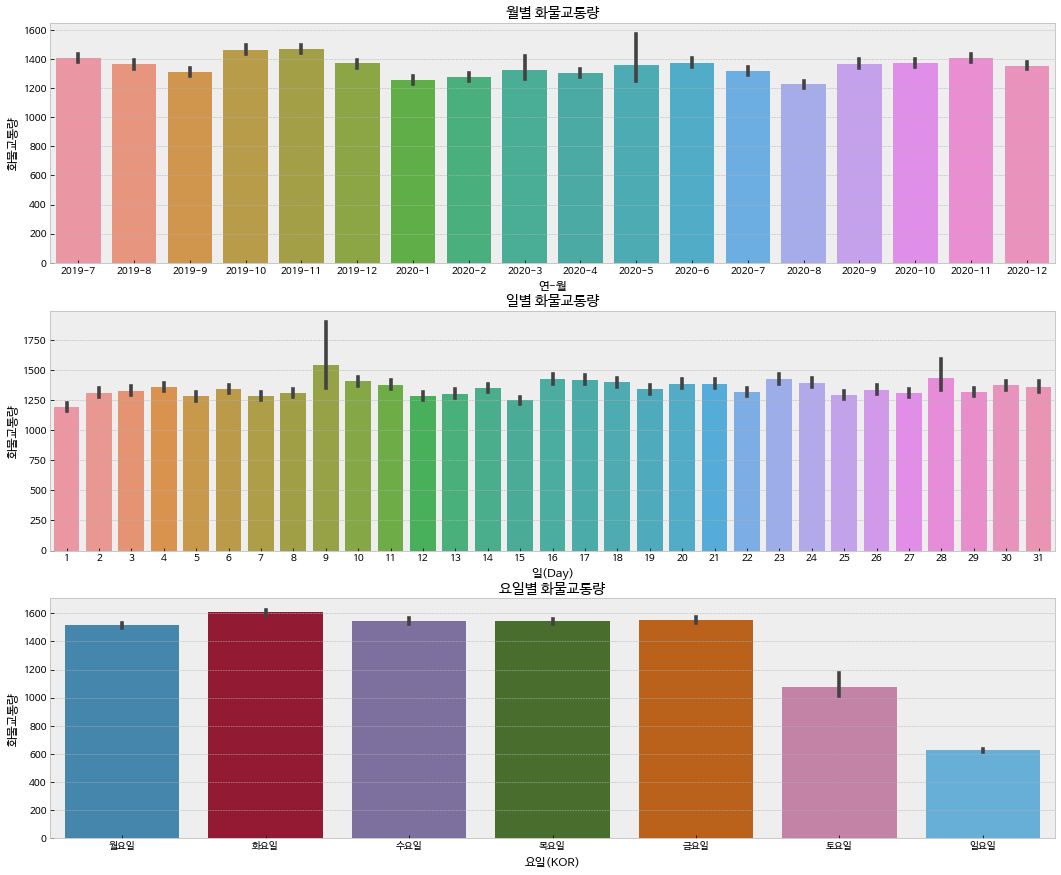

In [80]:
f, ax = plt.subplots(3, 1, figsize = (18, 15))
sns.barplot(data=total, x='연-월', y="화물교통량", ax=ax[0]).set_title('월별 화물교통량')
sns.barplot(data=total, x='일(Day)', y="화물교통량", ax=ax[1]).set_title('일별 화물교통량');
sns.barplot(data=total, x='요일(KOR)', y="화물교통량", ax=ax[2]).set_title('요일별 화물교통량');  #주말화물량이 적을 것으로 예측된다.

In [81]:

display(total.groupby('연-월')['화물교통량'].mean())
display(total.groupby('일(Day)')['화물교통량'].mean())
display(total.groupby('요일(KOR)')['화물교통량'].mean())

연-월
2019-10   1,464.9
2019-11   1,471.6
2019-12   1,370.6
2019-7    1,409.5
2019-8    1,363.9
2019-9    1,314.0
2020-1    1,254.9
2020-10   1,373.8
2020-11   1,408.2
2020-12   1,355.2
2020-2    1,279.5
2020-3    1,326.6
2020-4    1,305.0
2020-5    1,360.8
2020-6    1,376.7
2020-7    1,316.5
2020-8    1,226.4
2020-9    1,369.6
Name: 화물교통량, dtype: float64

일(Day)
1    1,191.3
2    1,312.5
3    1,330.7
4    1,365.0
5    1,284.6
6    1,342.8
7    1,289.3
8    1,312.5
9    1,546.6
10   1,411.5
11   1,381.5
12   1,290.6
13   1,305.8
14   1,353.7
15   1,249.8
16   1,430.0
17   1,424.0
18   1,399.8
19   1,344.3
20   1,388.0
21   1,389.0
22   1,320.2
23   1,428.5
24   1,395.3
25   1,293.1
26   1,340.2
27   1,313.7
28   1,437.3
29   1,317.7
30   1,375.0
31   1,363.1
Name: 화물교통량, dtype: float64

요일(KOR)
금요일   1,551.7
목요일   1,542.8
수요일   1,545.2
월요일   1,515.8
일요일     625.7
토요일   1,073.6
화요일   1,605.8
Name: 화물교통량, dtype: float64

In [82]:
cargoes = pd.melt(total, id_vars=['연-월', '일(Day)', '요일(KOR)'], value_vars=['화물교통량', '비화물교통량'])
cargoes.head(10), cargoes.tail(10)

(      연-월  일(Day) 요일(KOR) variable  value
 0  2019-7       1     월요일    화물교통량  11301
 1  2019-7       1     월요일    화물교통량  12498
 2  2019-7       1     월요일    화물교통량    130
 3  2019-7       1     월요일    화물교통량     83
 4  2019-7       1     월요일    화물교통량    375
 5  2019-7       1     월요일    화물교통량    422
 6  2019-7       1     월요일    화물교통량   3843
 7  2019-7       1     월요일    화물교통량   4018
 8  2019-7       1     월요일    화물교통량   5964
 9  2019-7       1     월요일    화물교통량   6009,
             연-월  일(Day) 요일(KOR) variable  value
 789234  2020-12      31     목요일   비화물교통량   1496
 789235  2020-12      31     목요일   비화물교통량   1694
 789236  2020-12      31     목요일   비화물교통량   3219
 789237  2020-12      31     목요일   비화물교통량   3318
 789238  2020-12      31     목요일   비화물교통량   2061
 789239  2020-12      31     목요일   비화물교통량   2153
 789240  2020-12      31     목요일   비화물교통량   3326
 789241  2020-12      31     목요일   비화물교통량   4336
 789242  2020-12      31     목요일   비화물교통량  11685
 789243  2020-12      31     목요일   비

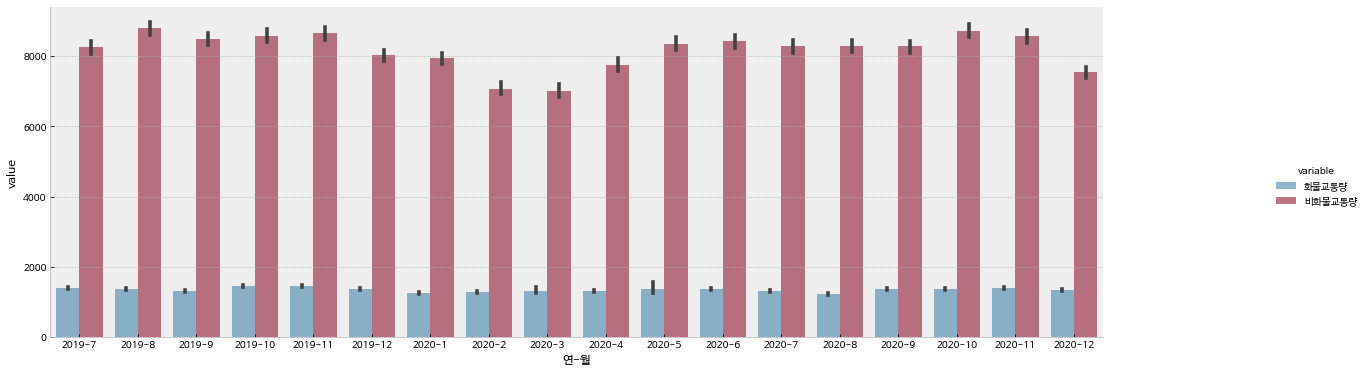

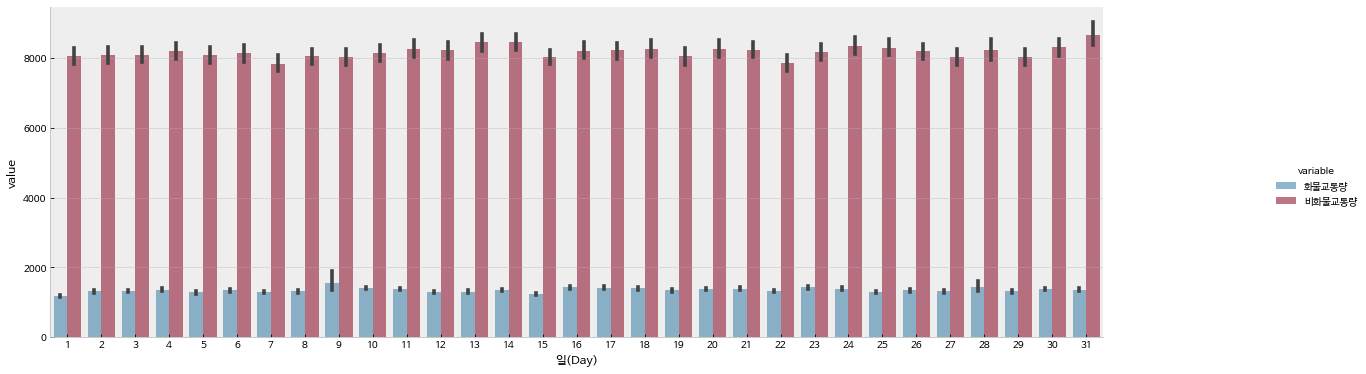

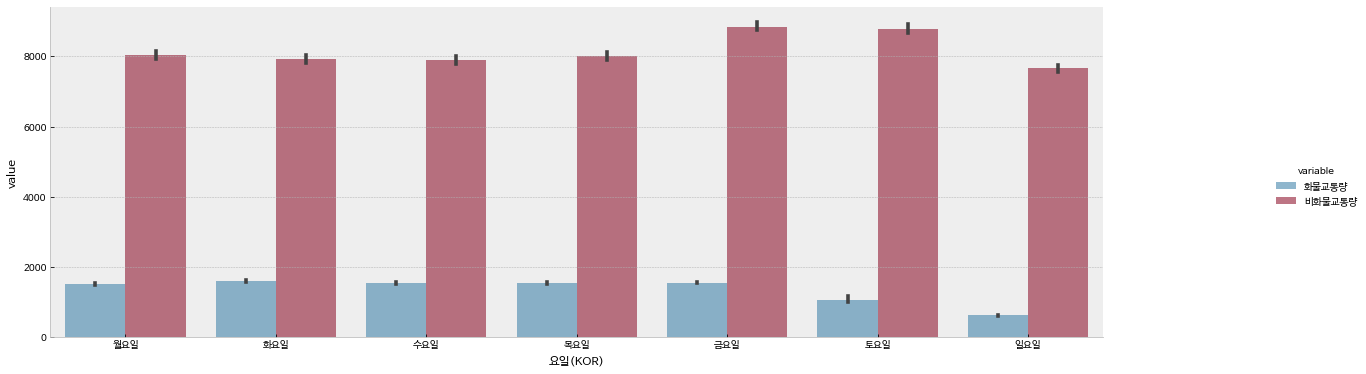

In [83]:
#비화물 교통량과 화물교통량 비교 
#화물교통량이 시즌별 영향이 더 적은편이다 

g = sns.catplot(data=cargoes, kind="bar",x="연-월", y="value", hue="variable", alpha=.6, height=6) 
g.fig.set_size_inches(20,5);
g2 = sns.catplot(data=cargoes, kind="bar",x="일(Day)", y="value", hue="variable", alpha=.6, height=6)
g2.fig.set_size_inches(20,5);
g3 = sns.catplot(data=cargoes, kind="bar",x="요일(KOR)", y="value", hue="variable", alpha=.6, height=6) 
g3.fig.set_size_inches(20,5);


In [84]:
total.head(5)

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원),연-월,요일(KOR)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일


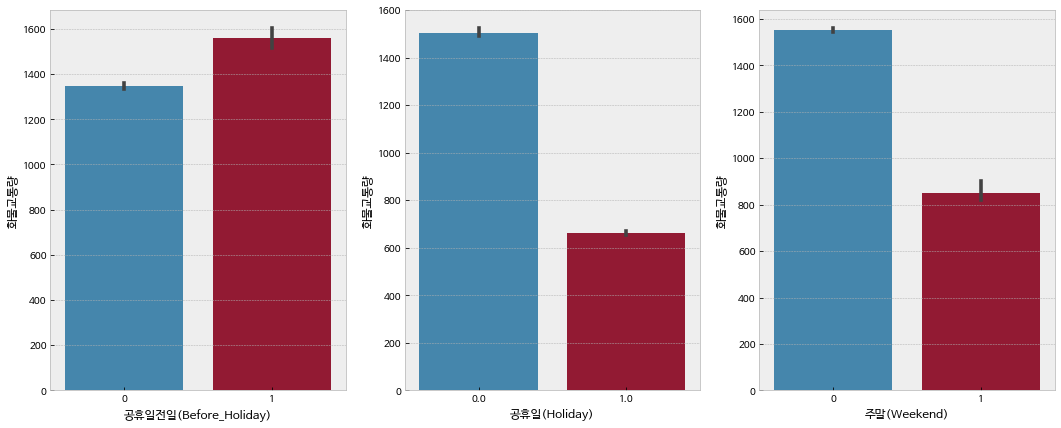

In [85]:
#주말, 공휴일, 공휴일 전일의 화물량 비교 
#업무일이 아닌 경우 화물 교통량이 주는 걸 볼 수 있습니다. 
#공휴일 전일에는 화물량이 느는 걸 알 수 있습니다.

fig, ax = plt.subplots(1,3, figsize =(18,7))
sns.barplot(data = total, x='공휴일전일(Before_Holiday)', y = '화물교통량', ax = ax[0])
sns.barplot(data = total, x='공휴일(Holiday)', y = '화물교통량', ax = ax[1])
sns.barplot(data = total, x='주말(Weekend)', y = '화물교통량', ax = ax[2]);


## 2) 날씨변화에 따른 교통량 추이

In [86]:
total.head(10)

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원),연-월,요일(KOR)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
5,2019-07-01,13,순천만,1,1,3122,422,2700,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
6,2019-07-01,29,가락(개),0,1,17152,3843,13309,2019,7,1,0,0,0.0,0,부산광역시,강서구,23.1,0.0,2.9,3404423,4086,43706972,29771,10273328,2019-7,월요일
7,2019-07-01,29,가락(개),1,1,19934,4018,15916,2019,7,1,0,0,0.0,0,부산광역시,강서구,23.1,0.0,2.9,3404423,4086,43706972,29771,10273328,2019-7,월요일
8,2019-07-01,53,남인천,0,1,42692,5964,36728,2019,7,1,0,0,0.0,0,인천광역시,남동구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
9,2019-07-01,53,남인천,1,1,43953,6009,37944,2019,7,1,0,0,0.0,0,인천광역시,남동구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일


In [87]:
total['평균기온(°C)'].describe()

count   394,622.0
mean         14.5
std           9.3
min         -10.6
25%           6.5
50%          15.0
75%          22.9
max          31.6
Name: 평균기온(°C), dtype: float64

In [88]:
total.columns

Index(['집계일자', '영업소코드', '영업소명', '입출구구분코드', '영업형태구분코드', '총교통량', '화물교통량',
       '비화물교통량', '연(Year)', '월(Month)', '일(Day)', '요일(DayofWeek)',
       '주말(Weekend)', '공휴일(Holiday)', '공휴일전일(Before_Holiday)', '자치구', '도시명',
       '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '총인구수(명)', '제조업사업체수(개)',
       '제조업출하액(백만원)', '운송창고업사업체수(개)', '운송창고업매출액(백만원)', '연-월', '요일(KOR)'],
      dtype='object')

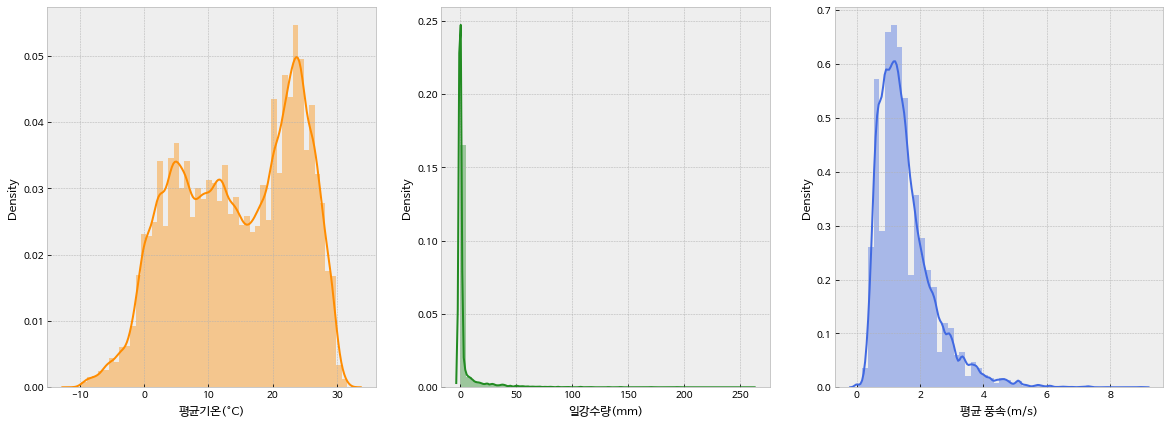

In [89]:
#기온, 강수량, 풍속 분포도

fig, ax = plt.subplots(1,3, figsize =(20,7))

sns.distplot(total['평균기온(°C)'], ax=ax[0], color = 'darkorange')
sns.distplot(total['일강수량(mm)'], ax=ax[1], color = 'forestgreen')
sns.distplot(total['평균 풍속(m/s)'], ax=ax[2], color='royalblue');

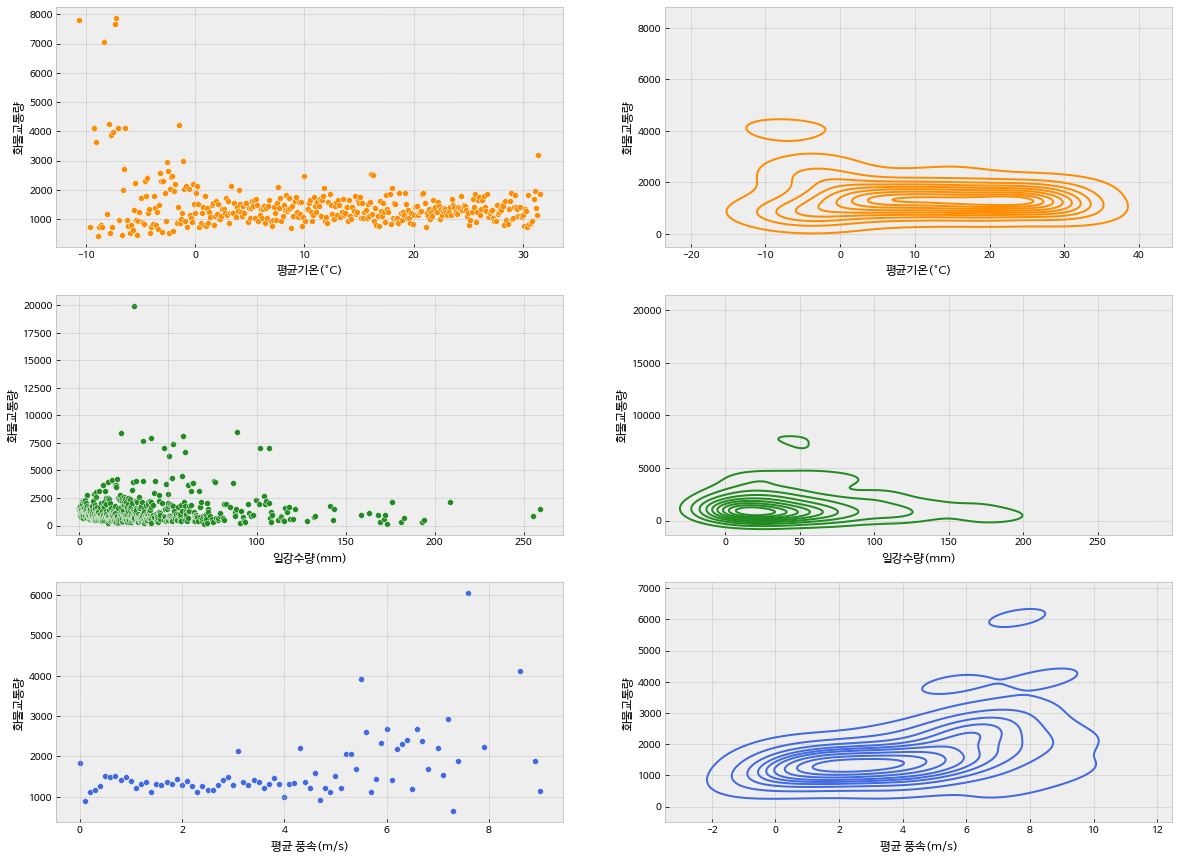

In [90]:
#기온, 강수량, 풍속변화에따른 화물교통량 평균

from sklearn.preprocessing import StandardScaler

cel = pd.DataFrame(total.groupby('평균기온(°C)')['화물교통량'].mean())
cel.reset_index(inplace=True)

rain = pd.DataFrame(total.groupby('일강수량(mm)')['화물교통량'].mean())
rain.reset_index(inplace=True)

wind = pd.DataFrame(total.groupby('평균 풍속(m/s)')['화물교통량'].mean())
wind.reset_index(inplace=True)

fig, ax = plt.subplots(3,2, figsize =(20,15))

sns.scatterplot(data=cel, x='평균기온(°C)', y='화물교통량', ax=ax[0][0], color ='darkorange')
sns.scatterplot(data=rain, x='일강수량(mm)', y='화물교통량', ax=ax[1][0], color ='forestgreen')
sns.scatterplot(data=wind, x='평균 풍속(m/s)', y='화물교통량', ax=ax[2][0], color='royalblue')
sns.kdeplot(data=cel, x='평균기온(°C)', y='화물교통량', ax=ax[0][1], color ='darkorange')
sns.kdeplot(data=rain, x='일강수량(mm)', y='화물교통량', ax=ax[1][1], color ='forestgreen')
sns.kdeplot(data=wind, x='평균 풍속(m/s)', y='화물교통량', ax=ax[2][1], color='royalblue');

## 3) 자치구별 화물교통량

In [91]:
total.head(10)

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원),연-월,요일(KOR)
0,2019-07-01,11,인천,0,1,79413,11301,68112,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
1,2019-07-01,11,인천,1,1,86751,12498,74253,2019,7,1,0,0,0.0,0,인천광역시,계양구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
2,2019-07-01,12,서영암(개),0,1,1182,130,1052,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
3,2019-07-01,12,서영암(개),1,1,910,83,827,2019,7,1,0,0,0.0,0,전라남도,영암군,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
4,2019-07-01,13,순천만,0,1,2862,375,2487,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
5,2019-07-01,13,순천만,1,1,3122,422,2700,2019,7,1,0,0,0.0,0,전라남도,순천시,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623,2019-7,월요일
6,2019-07-01,29,가락(개),0,1,17152,3843,13309,2019,7,1,0,0,0.0,0,부산광역시,강서구,23.1,0.0,2.9,3404423,4086,43706972,29771,10273328,2019-7,월요일
7,2019-07-01,29,가락(개),1,1,19934,4018,15916,2019,7,1,0,0,0.0,0,부산광역시,강서구,23.1,0.0,2.9,3404423,4086,43706972,29771,10273328,2019-7,월요일
8,2019-07-01,53,남인천,0,1,42692,5964,36728,2019,7,1,0,0,0.0,0,인천광역시,남동구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일
9,2019-07-01,53,남인천,1,1,43953,6009,37944,2019,7,1,0,0,0.0,0,인천광역시,남동구,22.3,0.0,2.6,2947217,4711,71659882,23822,8114072,2019-7,월요일


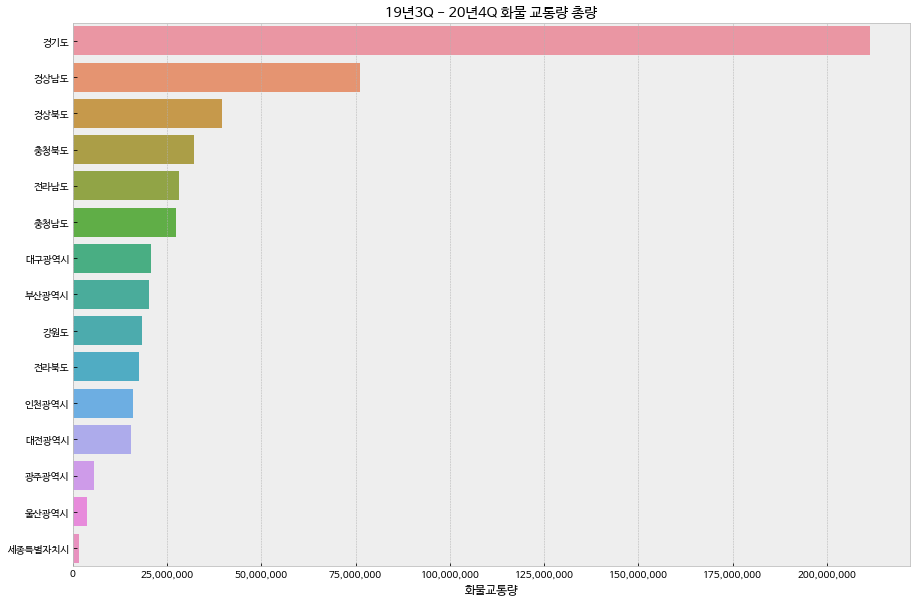

In [92]:
#자치구별 2019, 3분기부터 2020, 4분기까지의 화물 교통량 총량 비교 

dist_sum = pd.DataFrame(total.groupby('자치구')['화물교통량'].sum().sort_values(ascending = False))
dist_sum.reset_index(inplace=True)

fig = plt.figure(figsize = (15,10))
ax = sns.barplot(data = dist_sum, x ='화물교통량', y='자치구')
ax.set_title('19년3Q - 20년4Q 화물 교통량 총량')
ax.set(ylabel=None)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(x) for x in vals]);


In [93]:
total[['총인구수(명)', '제조업사업체수(개)', '제조업출하액(백만원)', '운송창고업사업체수(개)','운송창고업매출액(백만원)']] = total[['총인구수(명)', '제조업사업체수(개)', '제조업출하액(백만원)', '운송창고업사업체수(개)','운송창고업매출액(백만원)']].astype(int)

In [94]:
dist_total = pd.DataFrame(total.groupby('자치구')['총인구수(명)', '제조업사업체수(개)', '제조업출하액(백만원)', '운송창고업사업체수(개)','운송창고업매출액(백만원)'].mean())
dist_total.reset_index(inplace=True)
dist_total

,자치구,총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원)
0,강원도,1539282,1070,14379324,10379,1398110
1,경기도,13338020,24741,402658105,89402,15363274
2,경상남도,3349454,7148,129281034,20218,3191922
3,경상북도,2646493,5113,142970685,18499,6749256
4,광주광역시,1455048,1240,32558076,10732,1697231
5,대구광역시,2427954,3313,29966108,21860,2449036
6,대전광역시,1471040,868,18362191,11769,7900302
7,부산광역시,3404423,4086,43706972,29771,10273328
8,세종특별자치시,345341,300,7193577,7237,910748
9,울산광역시,1142190,1745,176510317,7380,2361996


In [95]:
dist_total = pd.merge(dist_total, dist_sum, on ='자치구')
dist_total

,자치구,총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원),화물교통량
0,강원도,1539282,1070,14379324,10379,1398110,18433036
1,경기도,13338020,24741,402658105,89402,15363274,211424852
2,경상남도,3349454,7148,129281034,20218,3191922,76102343
3,경상북도,2646493,5113,142970685,18499,6749256,39519973
4,광주광역시,1455048,1240,32558076,10732,1697231,5678653
5,대구광역시,2427954,3313,29966108,21860,2449036,20633611
6,대전광역시,1471040,868,18362191,11769,7900302,15300214
7,부산광역시,3404423,4086,43706972,29771,10273328,20254947
8,세종특별자치시,345341,300,7193577,7237,910748,1529834
9,울산광역시,1142190,1745,176510317,7380,2361996,3778251


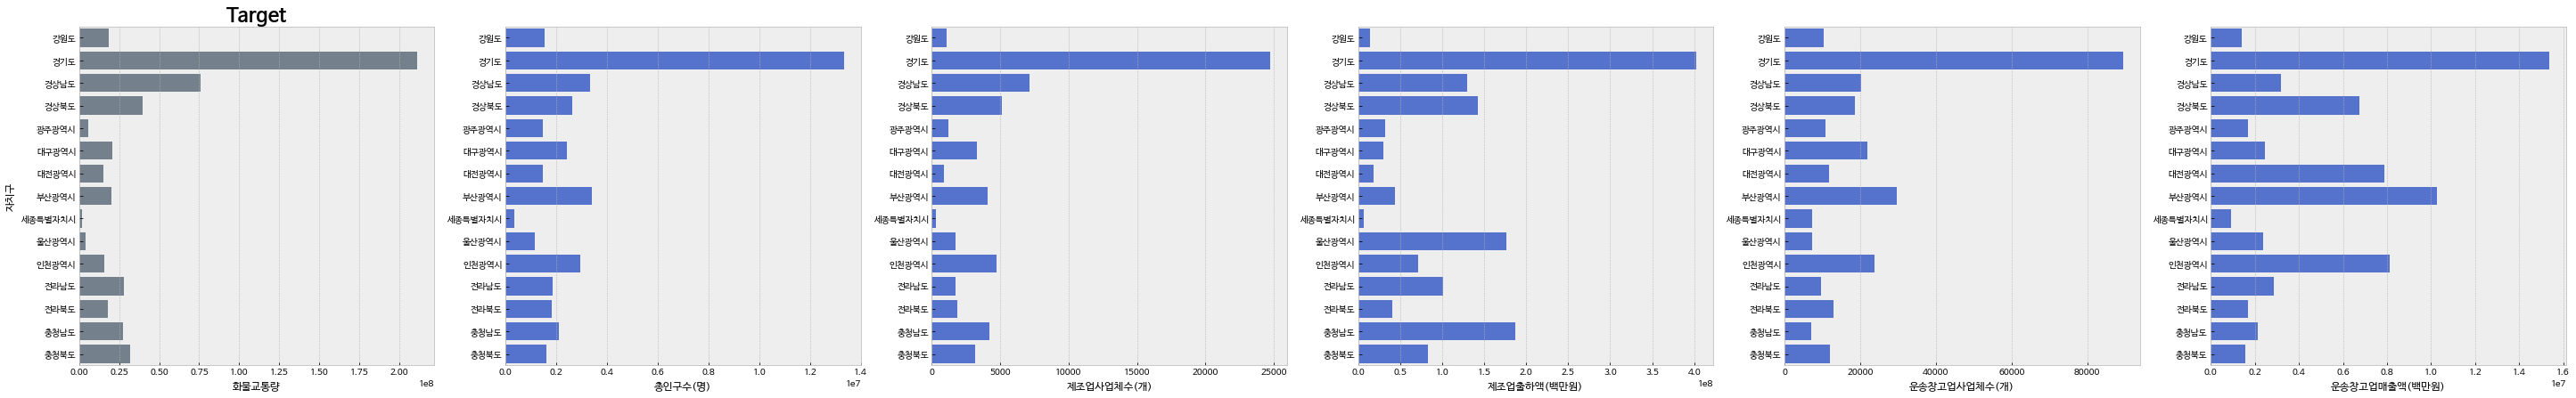

In [96]:
fig, ax = plt.subplots(1,6, figsize=(50,7))

sns.barplot(data=dist_total, y='자치구', x='화물교통량', ax= ax[0], color = 'slategrey').set_title('Target', fontdict= {'fontsize': 22, 'fontweight':'bold'});
sns.barplot(data=dist_total, y='자치구', x='총인구수(명)', ax= ax[1], color = 'royalblue').set(ylabel=None);
sns.barplot(data=dist_total, y='자치구', x='제조업사업체수(개)', ax=ax[2], color = 'royalblue').set(ylabel=None);
sns.barplot(data=dist_total, y='자치구', x='제조업출하액(백만원)', ax=ax[3], color = 'royalblue').set(ylabel=None);
sns.barplot(data=dist_total, y='자치구' , x='운송창고업사업체수(개)', ax=ax[4], color = 'royalblue' ).set(ylabel=None);
sns.barplot(data=dist_total, y='자치구', x='운송창고업매출액(백만원)', ax=ax[5], color = 'royalblue').set(ylabel=None);

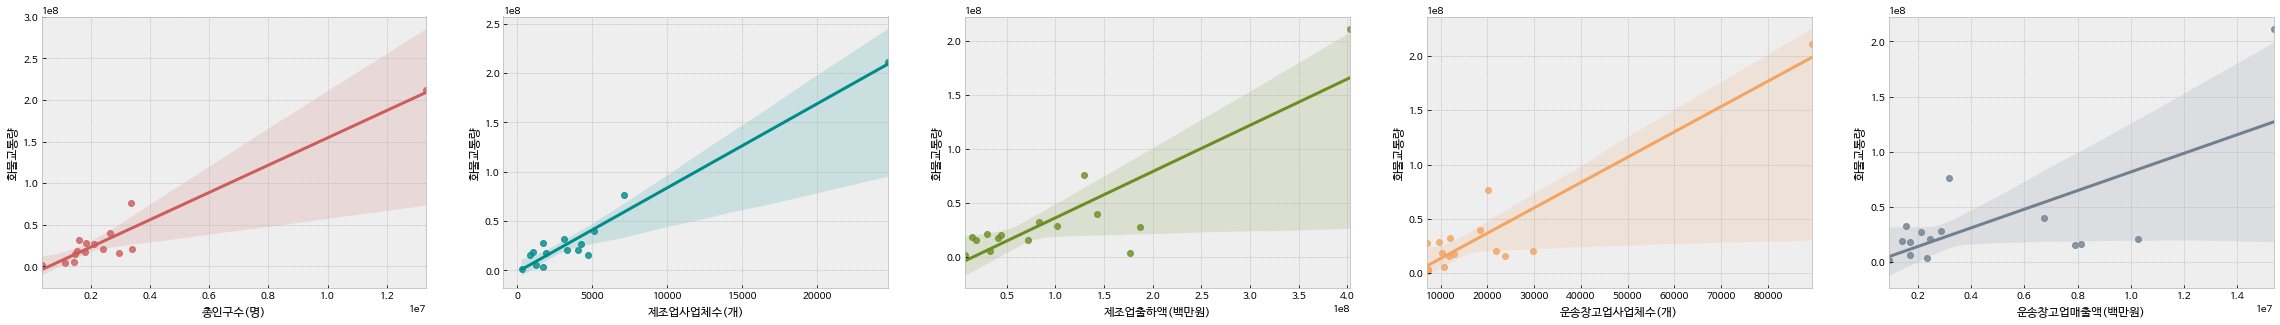

In [97]:
fig, ax = plt.subplots(1,5, figsize=(40,5))

sns.regplot(data=dist_total, x='총인구수(명)', y='화물교통량', ax= ax[0], color ='indianred');
sns.regplot(data=dist_total, x='제조업사업체수(개)', y='화물교통량', ax=ax[1], color = 'darkcyan');
sns.regplot(data=dist_total, x='제조업출하액(백만원)', y='화물교통량', ax=ax[2], color ='olivedrab');
sns.regplot(data=dist_total, x='운송창고업사업체수(개)', y='화물교통량', ax=ax[3], color ='sandybrown' );
sns.regplot(data=dist_total, x='운송창고업매출액(백만원)', y='화물교통량', ax=ax[4], color = 'slategrey');

## 4) 이상치 확인 및 처리 


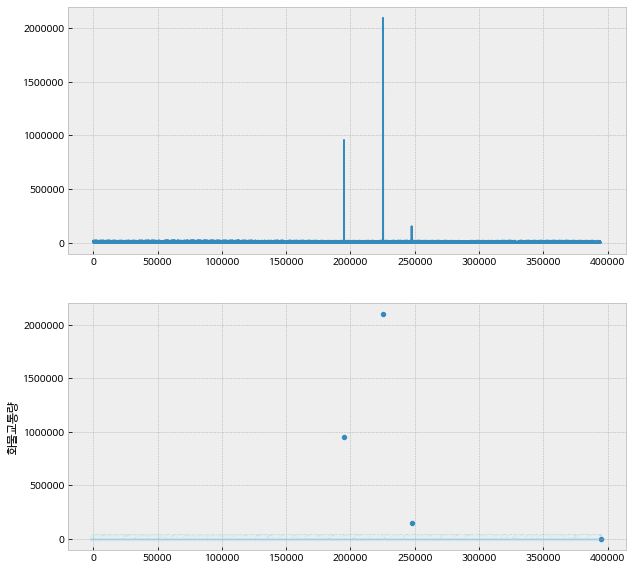

In [98]:

# 타겟값 이상치 확인

fig = plt.figure(figsize =(10,10))

ax1= fig.add_subplot(211)
ax1 = total['화물교통량'].plot();

ax2 = fig.add_subplot(212)
ax2 = sns.scatterplot(data=total, x=total.index, y = total['화물교통량'])


0.5%: 5.0 대 95%: 13630.0 대


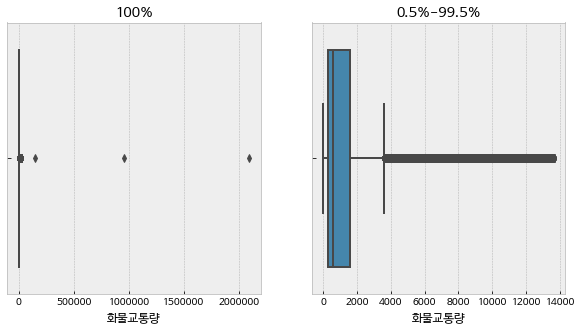

In [99]:

# 이상치 제거시 타겟값 분포 변화 

fig, ax = plt.subplots(1,2, figsize =(10,5))
sns.boxplot(total['화물교통량'], ax=ax[0]).set_title('100%')
sns.boxplot(total.loc[(total['화물교통량'] >= np.percentile(total['화물교통량'] , 0.5)) & (total['화물교통량'] <= np.percentile(total['화물교통량'] , 99.5))]['화물교통량'], ax=ax[1]).set_title('0.5%-99.5%');

print('0.5%:', np.percentile(total['화물교통량'] , 0.5),'대', '95%:', np.percentile(total['화물교통량'] , 99.5),'대' )

In [100]:

outliers = total.loc[(total['화물교통량'] < np.percentile(total['화물교통량'] , 0.5)) | (total['화물교통량'] > np.percentile(total['화물교통량'] , 99.5))].sort_values(by='화물교통량', ascending = True)
display(outliers.head()) #화물교통량이 0 
display(outliers.tail()) #화물교통량이 20,000대 이상 

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원),연-월,요일(KOR)
184577,2020-03-13,758,진영휴게소,1,0,20,0,20,2020,3,13,4,0,0.0,0,경상남도,김해시,10.3,0.0,1.8,3349454,7148,129281034,20218,3191922,2020-3,금요일
354311,2020-11-05,758,진영휴게소,1,0,19,0,19,2020,11,5,3,0,0.0,0,경상남도,김해시,10.0,0.0,1.3,3349454,7148,129281034,20218,3191922,2020-11,목요일
252936,2020-06-16,758,진영휴게소,1,0,7,0,7,2020,6,16,1,0,0.0,0,경상남도,김해시,24.3,0.0,1.8,3349454,7148,129281034,20218,3191922,2020-6,화요일
252217,2020-06-15,758,진영휴게소,1,0,20,0,20,2020,6,15,0,0,0.0,0,경상남도,김해시,24.7,0.0,1.7,3349454,7148,129281034,20218,3191922,2020-6,월요일
251498,2020-06-14,758,진영휴게소,1,0,9,0,9,2020,6,14,6,1,1.0,0,경상남도,김해시,24.7,5.1,2.4,3349454,7148,129281034,20218,3191922,2020-6,일요일


,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원),연-월,요일(KOR)
73198,2019-10-11,101,서울,1,0,119115,21411,97704,2019,10,11,4,0,0.0,0,경기도,성남시,16.7,0.0,1.0,13338020,24741,402658105,89402,15363274,2019-10,금요일
63146,2019-09-27,101,서울,1,0,120188,21439,98749,2019,9,27,4,0,0.0,0,경기도,성남시,19.8,0.0,0.5,13338020,24741,402658105,89402,15363274,2019-9,금요일
247658,2020-06-09,510,양양,0,0,154890,151745,3145,2020,6,9,1,0,0.0,0,강원도,양양군,26.9,0.0,0.9,1539282,1070,14379324,10379,1398110,2020-6,화요일
195014,2020-03-28,251,물금,1,0,2047119,956302,1090817,2020,3,28,5,1,0.0,0,경상남도,양산시,9.2,0.0,1.3,3349454,7148,129281034,20218,3191922,2020-3,토요일
225341,2020-05-09,296,지수,0,0,2366731,2094779,271952,2020,5,9,5,1,0.0,0,경상남도,진주시,16.3,30.9,3.1,3349454,7148,129281034,20218,3191922,2020-5,토요일


In [101]:
#실제로 이상치로 분류될 수 있는지 확인해보겠습니다. 
outliers['영업소명'].value_counts()

서울       803
구병산      584
진영휴게소    540
구리남양주    536
동둔내      376
서서울      296
김포       190
서양양      166
성남       143
신둔       104
임고        57
양촌         9
금강         2
지수         1
양양         1
북부산        1
물금         1
Name: 영업소명, dtype: int64

In [102]:
outliers_describe = pd.DataFrame(outliers.groupby('영업소명')['화물교통량'].describe())
outliers_describe.reset_index(inplace=True)
outliers_describe = outliers_describe[['영업소명', 'count', 'min', 'max']]

branch_mean = pd.DataFrame(total.groupby('영업소명')['화물교통량'].mean())
branch_mean.reset_index(inplace=True)
branch_mean.sort_values(ascending=False, inplace=True, by='화물교통량')

outliers_mean = pd.merge(outliers_describe, branch_mean, on='영업소명')
outliers_mean.rename(columns={'영업소명':'영업소명', 'count':'이상치 Count', 'min':'이상치 Min', 'max': '이상치 Max', '화물교통량':'영업소별 화물교통량 평균'}, inplace=True)
outliers_mean.sort_values(ascending = True, by = '이상치 Count')

#전체 타겟데이터의 0.5% 전후 데이터 모두가 이상치는 아닙니다.
#영업소별 화물교통량의 차이가 크기떄문입니다. (예) 일평균 화물 교통량: 서울영업소 - 15,011대 <-> 양양영업소 - 522대 

#물금, 북부산, 지수 등은 해당 영업소의 평균 교통량보다 큰 수치를 보이는 Outliers 데이터를 포함합니다.(제거필요)
#반면, 서울, 구리남양주, 서서울 등은 타 영업소보다 평균 교통량 수치가 매우 높습니다. (전체 데이터셋의 99.5%이상의 값이라도, 이상치가 아님)
#또한, 임고, 신둔 등은 일평균 화물차량이 적으므로 0이나 1의 데이터 관측되는게 이상치는 아닐 것으로 판단,
#따라서, 전체 타겟데이터의 평균이 아닌, 해당'영업소별' 평균을 크게 웃돌거나 밑도는 데이터만 제거하겠습니다. 

,영업소명,이상치 Count,이상치 Min,이상치 Max,영업소별 화물교통량 평균
5,물금,1.0,"956,302.0","956,302.0","3,748.9"
6,북부산,1.0,"20,987.0","20,987.0","3,027.1"
15,지수,1.0,"2,094,779.0","2,094,779.0","2,146.1"
12,양양,1.0,"151,745.0","151,745.0",522.0
2,금강,2.0,0.0,0.0,102.4
13,양촌,9.0,0.0,4.0,38.5
14,임고,57.0,1.0,4.0,12.7
11,신둔,104.0,0.0,4.0,30.5
10,성남,143.0,"13,635.0","14,929.0","11,072.7"
8,서양양,166.0,0.0,4.0,11.2


In [103]:
outliers.loc[(outliers['영업소명'] == '물금') | (outliers['영업소명'] == '북부산') | (outliers['영업소명'] == '지수') | (outliers['영업소명'] == '양양') |(outliers['영업소명'] == '금강') |(outliers['영업소명'] == '양촌')]

,집계일자,영업소코드,영업소명,입출구구분코드,영업형태구분코드,총교통량,화물교통량,비화물교통량,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원),연-월,요일(KOR)
291136,2020-08-09,117,금강,1,0,3,0,3,2020,8,9,6,1,1.0,0,충청북도,옥천군,26.5,27.3,1.3,1597593,3153,83363449,12000,1555083,2020-8,일요일
291135,2020-08-09,117,금강,0,0,3,0,3,2020,8,9,6,1,1.0,0,충청북도,옥천군,26.5,27.3,1.3,1597593,3153,83363449,12000,1555083,2020-8,일요일
4918,2019-07-07,599,양촌,0,0,38,0,38,2019,7,7,6,1,1.0,0,충청남도,논산시,23.9,0.0,2.4,2119771,4239,186536265,7071,2125513,2019-7,일요일
2770,2019-07-04,599,양촌,0,0,31,0,31,2019,7,4,3,0,0.0,0,충청남도,논산시,23.5,0.0,1.4,2119771,4239,186536265,7071,2125513,2019-7,목요일
7064,2019-07-10,599,양촌,1,0,1,0,1,2019,7,10,2,0,0.0,0,충청남도,논산시,20.8,10.5,2.7,2119771,4239,186536265,7071,2125513,2019-7,수요일
7779,2019-07-11,599,양촌,0,0,15,0,15,2019,7,11,3,0,0.0,0,충청남도,논산시,20.3,7.8,1.3,2119771,4239,186536265,7071,2125513,2019-7,목요일
3486,2019-07-05,599,양촌,0,0,7,1,6,2019,7,5,4,0,0.0,0,충청남도,논산시,24.4,0.0,1.2,2119771,4239,186536265,7071,2125513,2019-7,금요일
1339,2019-07-02,599,양촌,0,0,47,1,46,2019,7,2,1,0,0.0,0,충청남도,논산시,21.6,0.0,1.1,2119771,4239,186536265,7071,2125513,2019-7,화요일
8494,2019-07-12,599,양촌,0,0,41,1,40,2019,7,12,4,0,0.0,0,충청남도,논산시,21.9,0.0,1.6,2119771,4239,186536265,7071,2125513,2019-7,금요일
10641,2019-07-15,599,양촌,0,0,128,3,125,2019,7,15,0,0,0.0,0,충청남도,논산시,23.3,13.6,1.0,2119771,4239,186536265,7071,2125513,2019-7,월요일


이전 Data Shape: (394622, 27)
이상치 제거 후 Data Shape: (394607, 27)


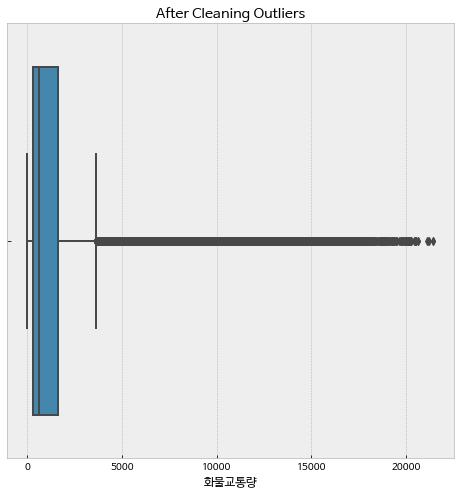

In [104]:
print('이전 Data Shape:', total.shape)
outlier_index = outliers.loc[(outliers['영업소명'] == '물금') | (outliers['영업소명'] == '북부산') | (outliers['영업소명'] == '지수') | (outliers['영업소명'] == '양양') |(outliers['영업소명'] == '금강') |(outliers['영업소명'] == '양촌')].index.tolist()
total.drop(outlier_index, axis = 0, inplace=True)
print('이상치 제거 후 Data Shape:', total.shape)

fig = plt.figure(figsize = (8,8))
sns.boxplot(total['화물교통량']).set_title('After Cleaning Outliers');


# 3. 모델 학습 및 예측


## 1) 베이스라인설정 및 데이터세트 나누기

In [105]:
#Train: 2019-3분기부터 2020-2분기까지의 데이터, 검증세트: 2020-3분기 데이터, 테스트세트: 2020-4분기 데이터

total['집계일자'] = pd.to_datetime(total['집계일자'])
train_date = '2020-06-30'
val_date = '2020-09-30'

train = total.loc[total['집계일자'] <= train_date]
val = total.loc[(total['집계일자'] > train_date) & (total['집계일자'] <= val_date)]
test = total.loc[total['집계일자'] > val_date]

print('train 데이터셋 날짜 시작-끝:', train['집계일자'].describe()[4], train['집계일자'].describe()[5])
print('validation 데이터셋 날짜 시작-끝:', val['집계일자'].describe()[4], val['집계일자'].describe()[5])
print('test 데이터셋 날짜 시작-끝:', test['집계일자'].describe()[4], test['집계일자'].describe()[5])

train.shape, val.shape, test.shape

train 데이터셋 날짜 시작-끝: 2019-07-01 00:00:00 2020-06-30 00:00:00
validation 데이터셋 날짜 시작-끝: 2020-07-01 00:00:00 2020-09-30 00:00:00
test 데이터셋 날짜 시작-끝: 2020-10-02 00:00:00 2020-12-31 00:00:00


((263015, 27), (66143, 27), (65449, 27))

In [106]:
target = '화물교통량'
features = ['영업소코드', '입출구구분코드', '영업형태구분코드',
       '연(Year)', '월(Month)', '일(Day)', '요일(DayofWeek)',
       '주말(Weekend)', '공휴일(Holiday)', '공휴일전일(Before_Holiday)', 
       '자치구', '도시명',
       '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '총인구수(명)', '제조업사업체수(개)', '제조업출하액(백만원)',
       '운송창고업사업체수(개)', '운송창고업매출액(백만원)'
       ]


X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [107]:
#베이스 모델은 트레인 데이터셋의 중앙값으로 정하였습니다.
#타겟값이 positively skewed 되어있어 평균값보다는 최빈값이 베이스모델로 적절할 것으로 생각했습니다.

from sklearn.metrics import mean_absolute_error, r2_score

base = train['화물교통량'].median()
print('전체화물교통량 중앙값:', '%.0f'%base, '대')
print('중앙값 베이스모델 설정시 MAE:', mean_absolute_error(y_train, [train['화물교통량'].median()]*len(y_train)))
print('평균값 베이스모델 설정시 MAE:', mean_absolute_error(y_val, [train['화물교통량'].mean()]*len(y_val)))

전체화물교통량 중앙값: 604 대
중앙값 베이스모델 설정시 MAE: 1066.0688173678307
평균값 베이스모델 설정시 MAE: 1228.905318317166


In [108]:
print('-------------Train DataSets-------------')
print('베이스모델 MAE:', mean_absolute_error(y_train, [train['화물교통량'].median()]*len(y_train)))
r2_train = r2_score(y_train, [train['화물교통량'].median()]*len(y_train))
print('베이스모델 결정계수:', f'{r2_train:.4f}')

print('-------------검증 DataSets---------------')
print('베이스모델 MAE:', mean_absolute_error(y_val, [train['화물교통량'].median()]*len(y_val)))
r2_val = r2_score(y_val, [train['화물교통량'].median()]*len(y_val))
print('베이스모델 결정계수:', f'{r2_val:.4f}')

-------------Train DataSets-------------
베이스모델 MAE: 1066.0688173678307
베이스모델 결정계수: -0.1251
-------------검증 DataSets---------------
베이스모델 MAE: 1035.3535975084287
베이스모델 결정계수: -0.1214


## 2) 파이파라인 구축 및 모델 예측 (RandomforestRegressor & XGBoostRegressor)

In [109]:
#제가 선택한 모델은 RandomforestRegressor와 XGBoostRegressor입니다.

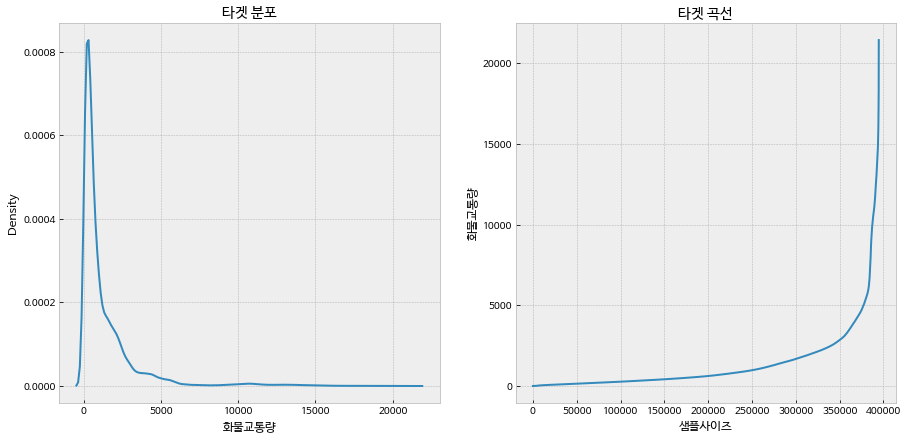

In [110]:
#데이터분포가 오른쪽으로 기울어져있고(Right Skewed), 타 관측치에 비해 값이 큰 row들이 다수 존재하기 때문입니다. 따라서 타 선형모델보다 더 정확한 예측을 할 것으로 기대하였습니다.
#랜덤포레스트 모델은 일반모델과 타겟데이터 로그변환한모델 모두를 학습해보겠습니다.

fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.kdeplot(total['화물교통량'].sort_values(), ax = ax[0]).set_title('타겟 분포')

ax2 = ax[1]
ax2.set(xlabel='샘플사이즈')
sns.lineplot(x=total.index, y=total['화물교통량'].sort_values(), ax=ax2).set_title('타겟 곡선');


In [111]:
from category_encoders import OrdinalEncoder, TargetEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

In [112]:
enc = make_pipeline(
    TargetEncoder(min_samples_leaf=1, smoothing=1),
    StandardScaler(),
)

X_train_processed = enc.fit_transform(X_train, y_train)
X_val_processed = enc.transform(X_val)
X_test_processed = enc.transform(X_test)

In [113]:
#최적의 하이퍼 파라미터를 찾아, 모델을 구축하겠습니다.
"""
param_distributions = { 
    'n_estimators': np.arange(10,301,10), 
    'max_depth': [5, 10, 15, None], 
    'max_features': uniform(0, 1)
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=2), 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=2
)

search.fit(X_train_processed, y_train);
"""

#print('Best HyperParameters: ', search.best_params_)
#print('Train Datasets MAE: ', -search.best_score_)
#model1 = search.best_estimator_
#pred1 = model1.predict(X_val_processed)

"\nparam_distributions = { \n    'n_estimators': np.arange(10,301,10), \n    'max_depth': [5, 10, 15, None], \n    'max_features': uniform(0, 1)\n}\n\nsearch = RandomizedSearchCV(\n    RandomForestRegressor(random_state=2), \n    param_distributions=param_distributions, \n    n_iter=10, \n    cv=3, \n    scoring='neg_mean_absolute_error', \n    verbose=10, \n    return_train_score=True, \n    n_jobs=-1, \n    random_state=2\n)\n\nsearch.fit(X_train_processed, y_train);\n"

In [114]:
#Randomized Search CV 진행 후 얻은 최적 파라미터 적용
#Best HyperParameters:  {'max_depth': 5, 'max_features': 0.8182267213548875, 'n_estimators': 80}
#Train Datasets MAE:  818.0858930810391

model_rf = RandomForestRegressor(max_depth=5,
                                  max_features = 0.8182267213548875,
                                  n_estimators = 80)
model_rf.fit(X_train_processed, y_train)
pred_rf = model_rf.predict(X_val_processed)


print('-----------------학습 DataSets-------------------')
print('R2:', model_rf.score(X_train_processed, y_train))
print('-----------------검증 DataSets-------------------')
print('베이스모델 MAE:', mean_absolute_error(y_val, [train['화물교통량'].median()]*len(y_val)))
print('베이스모델 결정계수:', f'{r2_val:.4f}')
print('Model1(RandomForestRegressor) MAE:', mean_absolute_error(y_val, pred_rf))
print('Model1(RandomForestRegressor) 결정계수:', r2_score(y_val, pred_rf))

#랜덤포레스트를 통하여 예측한 모델의 MAE와 R2스코어는 하기와 같습니다. 

-----------------학습 DataSets-------------------
R2: 0.7860846658453838
-----------------검증 DataSets-------------------
베이스모델 MAE: 1035.3535975084287
베이스모델 결정계수: -0.1214
Model1(RandomForestRegressor) MAE: 538.9462906359896
Model1(RandomForestRegressor) 결정계수: 0.7858718489063179


In [115]:
#앞서, 타겟데이터분포가 오른쪽으로 기울어져 있는 것을 확인했습니다. 로그변환하여 더 나은 모델을 만들 수 있을지 확인해보겠습니다.
#검증세트에서는 성능이 더 나빠졌네요.

tt = TransformedTargetRegressor(regressor=model_rf,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train_processed, y_train)
pred_rf_2 = tt.predict(X_val_processed)

tt.score(X_val_processed, y_val)

print('-----------------학습 DataSets-------------------')
print('기존 R2:', model_rf.score(X_train_processed, y_train))
print('로그 변환 후 R2:', tt.score(X_train_processed, y_train))
print('-----------------검증 DataSets-------------------')
print('R2:', tt.score(X_val_processed, y_val))
print('MAE:', mean_absolute_error(y_val, pred_rf_2))


-----------------학습 DataSets-------------------
기존 R2: 0.7860846658453838
로그 변환 후 R2: 0.5787352772885956
-----------------검증 DataSets-------------------
R2: 0.6017652527477855
MAE: 588.1728188074306


In [116]:
#이번에는 그라디언트 부스트 모델로 학습하여 보겠습니다.
#마찬가지로 XGBoost도 최적의 하이퍼 파리미터 확인 후 조치해주겠습니다. 

"""
param_distributions2 = {
    'min_child_weight':[4,5,6,7],  
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'eval_metric': ['rmse'],
    'learning_rate': [0.1, 0.2, 0.3] 
}

#https://docs.getml.com/latest/api/getml.predictors.XGBoostRegressor.html

search2 = RandomizedSearchCV(
    XGBRegressor(n_estimators=1000, max_depth=7, learning_rate=0.2),
    param_distributions = param_distributions2,
    n_iter =10,
    cv=3,
    scoring = 'neg_mean_absolute_error',
    verbose=10,
    return_train_score = True,
    n_jobs = -1,
    random_state =2
    
)

search2.fit(X_train_processed, y_train)
"""

#print('Best HyperParameters: ', search2.best_params_)
#print('Train Datasets MAE: ', search2.best_score_)

"\nparam_distributions2 = {\n    'min_child_weight':[4,5,6,7],  \n    'max_depth': [2,3,4,6,7],\n    'objective': ['reg:squarederror', 'reg:tweedie'],\n    'eval_metric': ['rmse'],\n    'learning_rate': [0.1, 0.2, 0.3] \n}\n\n#https://docs.getml.com/latest/api/getml.predictors.XGBoostRegressor.html\n\nsearch2 = RandomizedSearchCV(\n    XGBRegressor(n_estimators=1000, max_depth=7, learning_rate=0.2),\n    param_distributions = param_distributions2,\n    n_iter =10,\n    cv=3,\n    scoring = 'neg_mean_absolute_error',\n    verbose=10,\n    return_train_score = True,\n    n_jobs = -1,\n    random_state =2\n    \n)\n\nsearch2.fit(X_train_processed, y_train)\n"

In [117]:
#Best HyperParameters:  {'objective': 'reg:squarederror', 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'eval_metric': 'rmse', 'n_estimators': 797}

model_XGBoost = XGBRegressor(
    n_estimators=797,  
    max_depth=7,        
    learning_rate=0.2,
    n_jobs=-1,
    objective = 'reg:squarederror',
    min_child_weight = 5
    )

#eval_set = [(X_train_processed, y_train), 
#            (X_val_processed, y_val)]

model_XGBoost.fit(X_train_processed, y_train) 

y_pred_XGBoost = model_XGBoost.predict(X_val_processed)

In [118]:


print('===================검증 DataSets=======================')
print('베이스모델 MAE:', mean_absolute_error(y_val, [train['화물교통량'].median()]*len(y_val)))
print('베이스모델 결정계수:', f'{r2_val:.4f}')
print('-------------------Randomforestregressor--------------')
print('Model1(RandomForestRegressor) MAE:', mean_absolute_error(y_val, pred_rf))
print('Model1(RandomForestRegressor) 결정계수:', r2_score(y_val, pred_rf))
print('--------------------XGBoost Regressor-----------------')
print('Model2(GradientBoostedRegressor) MAE:', mean_absolute_error(y_val, y_pred_XGBoost))
print('Model2(GradientBoostedRegressor) 결정계수:', r2_score(y_val, y_pred_XGBoost))


===================검증 DataSets=======================
베이스모델 MAE: 1035.3535975084287
베이스모델 결정계수: -0.1214
-------------------Randomforestregressor--------------
Model1(RandomForestRegressor) MAE: 538.9462906359896
Model1(RandomForestRegressor) 결정계수: 0.7858718489063179
--------------------XGBoost Regressor-----------------
Model2(GradientBoostedRegressor) MAE: 126.68798150957282
Model2(GradientBoostedRegressor) 결정계수: 0.9847422994090702


## 3) Test DataSet 예측하기 



In [119]:

pred_test_rf = model_rf.predict(X_test_processed)
pred_test_XGB = model_XGBoost.predict(X_test_processed)


print('===================Test DataSets======================')
print('베이스모델 MAE:', mean_absolute_error(y_test, [train['화물교통량'].median()]*len(y_test)))
print('베이스모델 결정계수:', r2_score(y_test,[train['화물교통량'].median()]*len(y_test)))
print('-------------------Randomforestregressor--------------')
print('Model1(RandomForestRegressor) MAE:', mean_absolute_error(y_test, pred_test_rf))
print('Model1(RandomForestRegressor) 결정계수:', r2_score(y_test, pred_test_rf))
print('--------------------XGBoost Regressor-----------------')
print('Model2(GradientBoostedRegressor) MAE:', mean_absolute_error(y_test, pred_test_XGB))
print('Model2(GradientBoostedRegressor) 결정계수:', r2_score(y_test, pred_test_XGB))


===================Test DataSets======================
베이스모델 MAE: 1085.9386850830417
베이스모델 결정계수: -0.13989445750886742
-------------------Randomforestregressor--------------
Model1(RandomForestRegressor) MAE: 560.2099267322208
Model1(RandomForestRegressor) 결정계수: 0.7797989478967382
--------------------XGBoost Regressor-----------------
Model2(GradientBoostedRegressor) MAE: 114.20456665562797
Model2(GradientBoostedRegressor) 결정계수: 0.9898801015344879


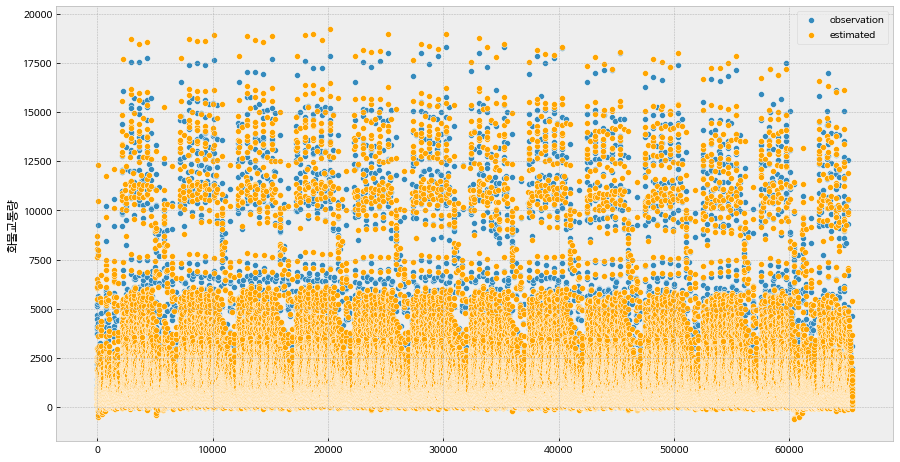

In [120]:
a = np.arange(1,len(y_test)+1)
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x=a, y= y_test, label = 'observation')
sns.scatterplot(x=a, y= pred_test_XGB, color='orange', label = 'estimated');

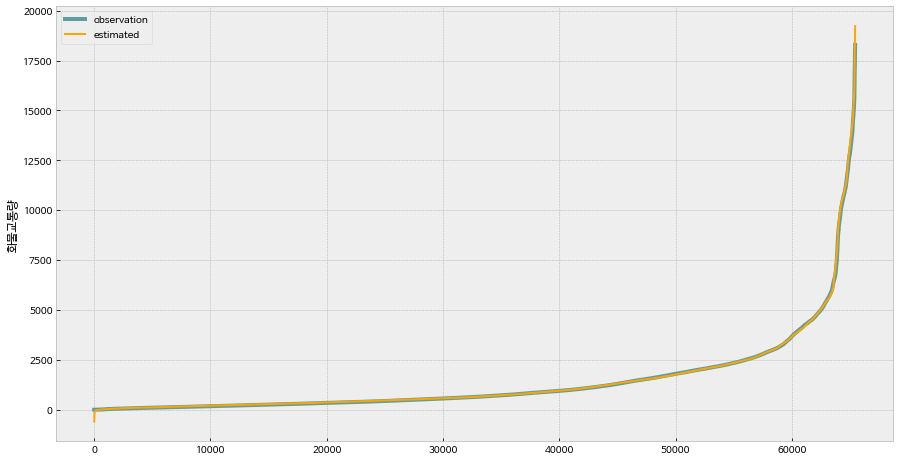

In [121]:
fig = plt.figure(figsize=(15,8))
sns.lineplot(x=a, y = y_test.sort_values(), color = 'cadetblue', linewidth=4, label = 'observation')
sns.lineplot(x=a, y = pd.Series(pred_test_XGB).sort_values(), color = 'orange', linewidth = 2, label = 'estimated');

# 4. 모델  해석하기


## 1) 특성중요도(Feature Importance) 및 순열중요도(Permutation Importance)

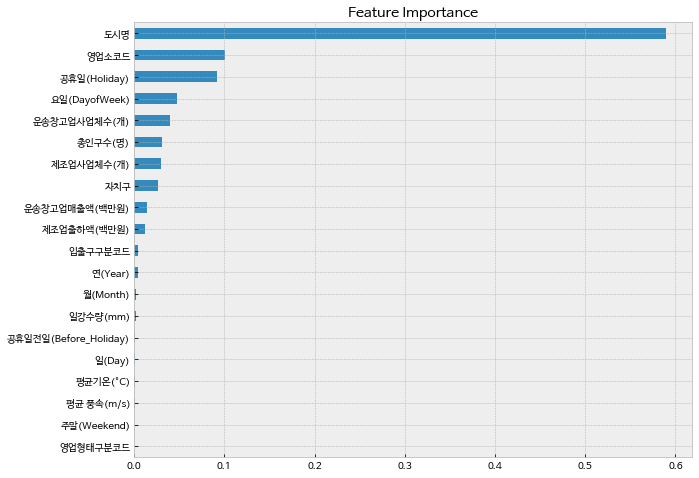

In [122]:
importance = pd.Series(model_XGBoost.feature_importances_, X_train.columns)
importance.sort_values(ascending=True, inplace = True)
plt.figure(figsize=(10,8))
importance.plot.barh().set_title('Feature Importance');

In [123]:
#! pip install eli5

In [124]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model_XGBoost)
permuter.fit(X_train_processed, y_train)


PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.2,
                                             max_delta_step=0, max_depth=7,
                                             min_child_weight=5, missing=None,
                                             n_estimators=797, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:squarederror',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                

In [125]:
#Value에 대한 해석: https://social.msdn.microsoft.com/Forums/en-US/1fadeb97-cda9-4a34-b681-279ef60a724e/what-does-a-negative-value-in-permutation-feature-importance-mean?forum=MachineLearning 
perm_imp = pd.Series(permuter.feature_importances_, X_train.columns.tolist())
perm_imp.sort_values(ascending=True, inplace = True)

In [126]:
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names= X_train.columns.tolist()
)

Weight,Feature
1.3531 ± 0.0089,도시명
0.6380 ± 0.0040,영업소코드
0.0694 ± 0.0004,공휴일(Holiday)
0.0680 ± 0.0012,요일(DayofWeek)
0.0086 ± 0.0000,자치구
0.0079 ± 0.0001,입출구구분코드
0.0056 ± 0.0001,월(Month)
0.0034 ± 0.0001,일(Day)
0.0027 ± 0.0001,평균기온(°C)
0.0023 ± 0.0001,일강수량(mm)


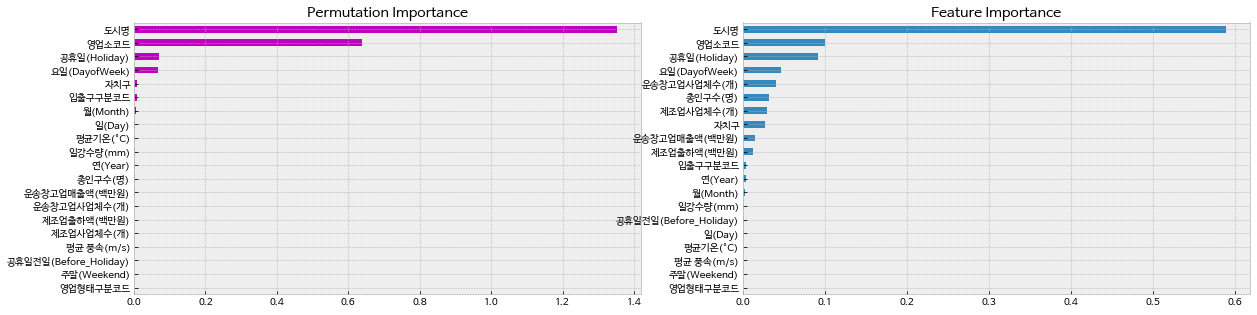

In [127]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

perm_imp.plot.barh(color = 'm', ax=ax[0]).set_title('Permutation Importance');
importance.plot.barh(ax=ax[1]).set_title('Feature Importance');

## 2) Partial Dependence 확인하기 
순열 중요도가 높은 4개 특성(['도시명', '영업소코드', '공휴일(Holiday)', '요일(DayofWeek)'])중 Cardinality 가 낮은 두 가지, 

공휴일과 요일별 특성이 각각 타겟에 어떤영향을 미치는지 확인해보겠습니다.
- '공휴일(Holiday)', '요일(DayofWeek)'


In [128]:
from pdpbox.pdp import pdp_isolate, pdp_plot

#순열 중요도가 높게 확인된, 특성 4개의 Partial Dependance를 확인하겠습니다.

feature_imp = perm_imp.sort_values(ascending=False)[:4].index
feature_imp

Index(['도시명', '영업소코드', '공휴일(Holiday)', '요일(DayofWeek)'], dtype='object')

In [129]:
feat_name_list = pd.Series(model_XGBoost.get_booster().feature_names, X_train.columns)
feat_name_list

영업소코드                     f0
입출구구분코드                   f1
영업형태구분코드                  f2
연(Year)                   f3
월(Month)                  f4
일(Day)                    f5
요일(DayofWeek)             f6
주말(Weekend)               f7
공휴일(Holiday)              f8
공휴일전일(Before_Holiday)     f9
자치구                      f10
도시명                      f11
평균기온(°C)                 f12
일강수량(mm)                 f13
평균 풍속(m/s)               f14
총인구수(명)                  f15
제조업사업체수(개)               f16
제조업출하액(백만원)              f17
운송창고업사업체수(개)             f18
운송창고업매출액(백만원)            f19
dtype: object

In [130]:
#정규화를 진행하지 않은 데이터로 확인해보겠습니다. 

tge = TargetEncoder(min_samples_leaf=1, smoothing=1)
X_train_processed_df = tge.fit_transform(X_train, y_train)
X_train_processed_df.columns = model_XGBoost.get_booster().feature_names
X_train_processed_df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19
0,11,0,1,2019,7,1,0,0,0.0,0,"7,359.0","9,850.2",22.3,0.0,2.6,2947217,4711,71659882,23822,8114072
1,11,1,1,2019,7,1,0,0,0.0,0,"7,359.0","9,850.2",22.3,0.0,2.6,2947217,4711,71659882,23822,8114072
2,12,0,1,2019,7,1,0,0,0.0,0,646.2,396.9,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623
3,12,1,1,2019,7,1,0,0,0.0,0,646.2,396.9,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623
4,13,0,1,2019,7,1,0,0,0.0,0,646.2,556.6,22.4,0.7,1.2,1854618,1720,101554448,9754,2862623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263023,985,1,0,2020,6,30,1,0,0.0,0,646.2,427.4,20.3,3.5,2.7,1854618,1720,101554448,9754,2862623
263024,986,0,0,2020,6,30,1,0,0.0,0,646.2,472.8,20.3,3.5,2.7,1854618,1720,101554448,9754,2862623
263025,986,1,0,2020,6,30,1,0,0.0,0,646.2,472.8,20.3,3.5,2.7,1854618,1720,101554448,9754,2862623
263026,987,0,0,2020,6,30,1,0,0.0,0,646.2,556.6,20.3,3.5,2.7,1854618,1720,101554448,9754,2862623


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


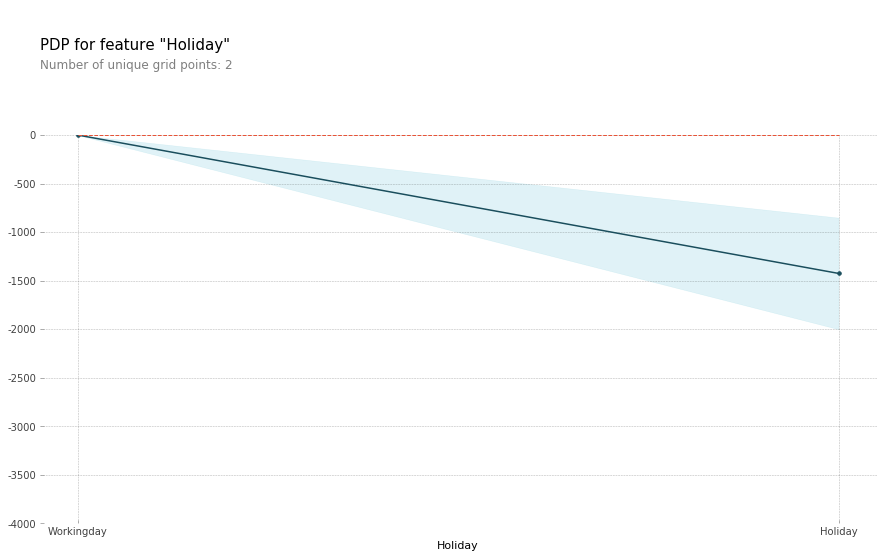

In [131]:
#특성: '공휴일'별 확인 (0:비공휴일, 1:공휴일)

isolated = pdp_isolate(
    model=model_XGBoost, 
    dataset=X_train_processed_df, 
    model_features=model_XGBoost.get_booster().feature_names, 
    feature='f8',
    grid_type='percentile'
)
pdp_plot(isolated, feature_name='Holiday')
plt.xticks([0, 1], ['Workingday', 'Holiday']);

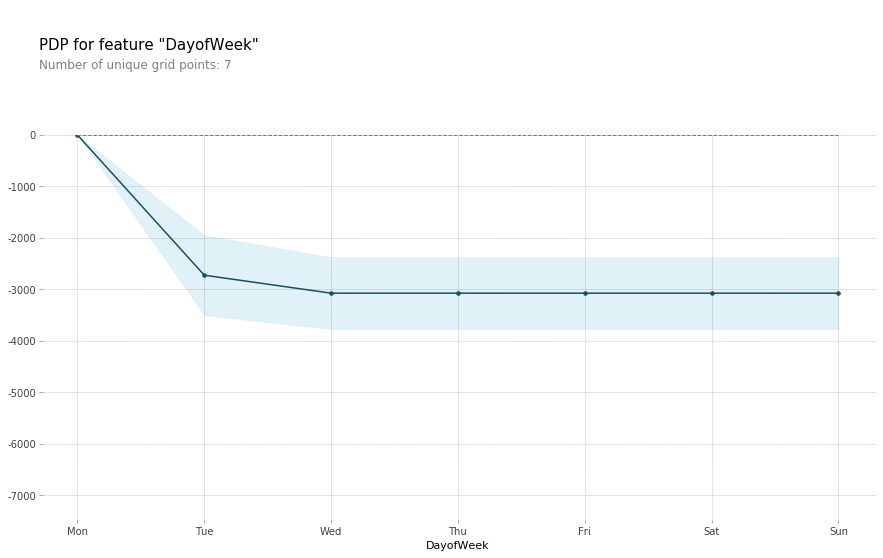

In [132]:
#특성: '요일'별 확인 

isolated = pdp_isolate(
    model=model_XGBoost, 
    dataset=X_train_processed_df, 
    model_features=model_XGBoost.get_booster().feature_names, 
    feature='f6',
    grid_type='percentile',
    num_grid_points=20
)
pdp_plot(isolated, feature_name='DayofWeek')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

## 3) 개별 관측치 특성 기여도 확인하기

In [133]:
row = X_test.iloc[[15000]]
row

,영업소코드,입출구구분코드,영업형태구분코드,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원)
344173,597,1,0,2020,10,22,3,0,0.0,0,경기도,여주시,12.3,0.0,1.1,13338020,24741,402658105,89402,15363274


In [134]:
row_feat = X_test.columns
row = enc.transform(row) #예측값
estimated_value1 = model_XGBoost.predict(row)
print('실측값:', y_test[344173] , '예측값:', estimated_value1[0])

실측값: 1126 예측값: 952.0227


In [135]:
import shap

explainer = shap.TreeExplainer(model_XGBoost)
shap_values = explainer.shap_values(row)
print('월: 10월,  ', '입출구구분: 출구(1),  ', '자치구: 경기도,  ', '공휴일 유무: 무,  ','요일: 목요일,  ', '영업소: 서여주,  ', '도시: 여주시')

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row_feat
)


#서여주 영업소(1), 여주시(2) 특성이 타겟값을 낮게 예측하는데 영향을 미쳤습니다.

월: 10월,   입출구구분: 출구(1),   자치구: 경기도,   공휴일 유무: 무,   요일: 목요일,   영업소: 서여주,   도시: 여주시


In [159]:
#이번에는 화물교통량이 많은 서울 영업소 데이터를 확인해보겠습니다. 
row2 = X_test.loc[[393936]]
row2

,영업소코드,입출구구분코드,영업형태구분코드,연(Year),월(Month),일(Day),요일(DayofWeek),주말(Weekend),공휴일(Holiday),공휴일전일(Before_Holiday),자치구,도시명,평균기온(°C),일강수량(mm),평균 풍속(m/s),총인구수(명),제조업사업체수(개),제조업출하액(백만원),운송창고업사업체수(개),운송창고업매출액(백만원)
393936,101,0,0,2020,12,31,3,0,0.0,1,경기도,성남시,-9.1,0.0,1.2,13338020,24741,402658105,89402,15363274


In [160]:
row2 = enc.transform(row2) 
estimated_value2 = model_XGBoost.predict(row2)
print('실측값:',y_test[393936], '예측값:', estimated_value2[0])

실측값: 13536 예측값: 14135.675


In [163]:

shap_values2 = explainer.shap_values(row2)

print('요일: 목요일 ', '영업소코드: 서울영업소(101), ', '도시명: 경기도성남시, ',  '입출구구분: 입구(0), ', '일: 31일')

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values2,
    features=row_feat
)

#앞선 여주시 데이터와는 상이하게, 서울 영업소데이터는 지점명과 위치한 도시특성이 타겟값을 높게 예측하는데 영향을 미쳤습니다.

요일: 목요일  영업소코드: 서울영업소(101),  도시명: 경기도성남시,  입출구구분: 입구(0),  일: 31일


# 5. 마치며

아쉬운 점

1. 새로이 추가한 특성이 타겟 예측에 큰 도움이 되지 못했다. 실제로, 날씨 데이터나 인구 데이터, 제조업 생산액 특성은 순열 중요도 확인시 0.005에도 미치지 못하는 점수가 나왔다. 실제 해당 고속도로의 화물차 수용량, 사고발생 다발지역 여부 등 다른 특성 데이터를 더할 수 있다면 좋았을 것 같다.

2. Target Encoder 를 사용하면서, 정보의 누수가 일어날 가능성이 커졌다. OrdinalEncoder사용시 Target Encoder와 MAE가 1,000넘게 차이가 났다. 베이스모델보다 못한 수치였다. 이러한 단점에도 Target Encoder사용시에도 검증데이터와 테스트데이터셋 모두 좋은 결과를 내어주었으므로, 훈련 데이터 셋에만 과적합이 되지 않았다고 판단, 해당 인코딩법을 사용하기로 결정했다.

3. 타겟데이터의 분포가 고르지 못했다. 특정지역의 영업소들만 들여다본다든지 주제를 조금 좁혀 잡았다면, 더 좋은 성능의 모델을 만들 수 있었을 것이다. 더불어 영업속 특성의 Cardinality도 줄었을 것이다.






> 1. 새로이 추가한 외부 특성 중 다수가 타겟 예측에 큰 도움이 되지 못했다. 실제로, 날씨 데이터나 인구 데이터, 제조업 생산액 특성은 순열 중요도 확인시 0.005에도 미치지 못하는 점수가 더러 나왔다.



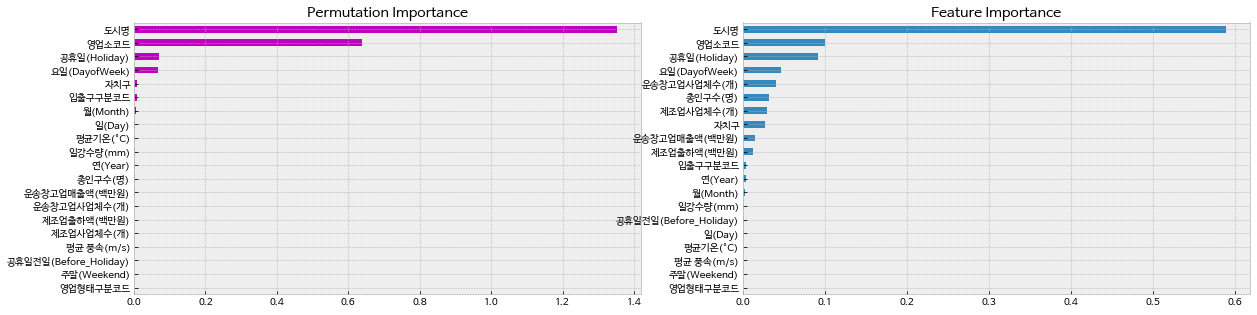

In [139]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

perm_imp.plot.barh(color = 'm', ax=ax[0]).set_title('Permutation Importance');
importance.plot.barh(ax=ax[1]).set_title('Feature Importance');



> 2. Target Encoder 를 사용하면서, 정보의 누수가 일어날 가능성이 커졌다. OrdinalEncoder사용시 Target Encoder와 MAE가 1,000넘게 차이가 났다. 베이스모델보다 못한 수치였다. 이러한 단점에도 Target Encoder사용시에도 검증데이터와 테스트데이터셋 모두 좋은 결과를 내어주었으므로, 훈련 데이터 셋에만 과적합이 되지 않았다고 판단, 해당 인코딩법을 사용하기로 결정했다.



In [140]:
print('--------------------Target Encoder-----------------')
print('Model2(GradientBoostedRegressor) MAE:', mean_absolute_error(y_test, pred_test_XGB))
print('Model2(GradientBoostedRegressor) 결정계수:', r2_score(y_test, pred_test_XGB))

--------------------Target Encoder-----------------
Model2(GradientBoostedRegressor) MAE: 114.20456665562797
Model2(GradientBoostedRegressor) 결정계수: 0.9898801015344879


In [141]:
ord_enc = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
)

X_train_processed_ord = ord_enc.fit_transform(X_train, y_train)
X_test_processed_ord = ord_enc.transform(X_test)

model_new = XGBRegressor(
    n_estimators=797,  
    max_depth=7,        
    learning_rate=0.2,
    n_jobs=-1,
    objective = 'reg:squarederror',
    min_child_weight = 5
    )

model_new.fit(X_train_processed_ord, y_train) 
y_pred_test_new = model_XGBoost.predict(X_test_processed_ord)

print('------------------Ordinal Encoder-----------------')
print('MAE:', mean_absolute_error(y_test, y_pred_test_new))
print('결정계수:', r2_score(y_test, y_pred_test_new))

------------------Ordinal Encoder-----------------
MAE: 1621.5586852041804
결정계수: -0.5399276792279006




> 3. 타겟데이터의 분포가 고르지 못했다. 지역을 한정하거나, 계절, 날씨 등 주제를 조금 좁혀 잡았다면, 더 좋은 성능의 설득력있는 모델을 만들 수 있었을 것이다. Cardinality도 줄었을 것이다.



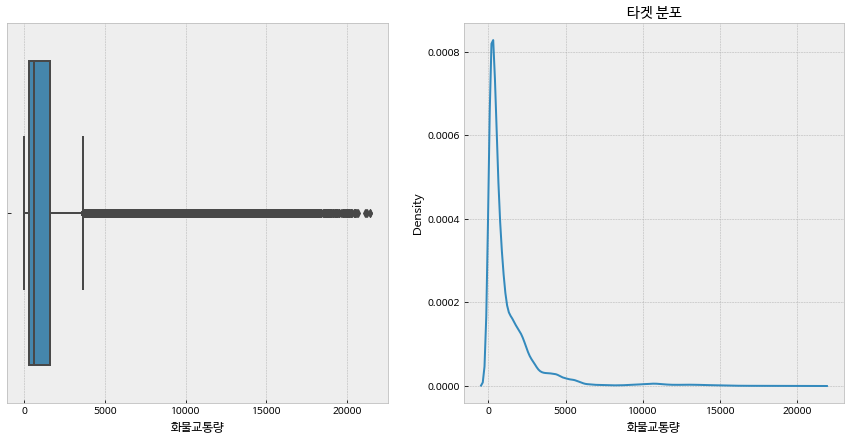

In [142]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

sns.boxplot(total['화물교통량'], ax=ax[0])
sns.kdeplot(total['화물교통량'].sort_values(), ax = ax[1]).set_title('타겟 분포');